In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm,skew
from subprocess import check_output
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SouthGermanCredit.csv',sep=' ')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [3]:
columns =['status','duration','credit_history','purpose','amount','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','present_residence','property','age','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk']

In [4]:
df.columns = columns
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [6]:
df.shape

(1000, 21)

#### Replacing the numerical values with original values in all categorical columns

In [7]:
status = {1:'no checking account', 2:'less than 0 DM', 3:'0 to 200 DM', 4:'200 DM or more'}
df['status'] = df['status'].map(status)

credit_history = {0 : 'delay in paying off in the past',       
 1 : 'critical account/other credits elsewhere',   
 2 : 'no credits taken/all credits paid back duly',
 3 : 'existing credits paid back duly till now',
 4 : 'all credits at this bank paid back duly'}
df['credit_history'] = df['credit_history'].map(credit_history)

purpose = {0 : 'others', 1 : 'car (new)', 2 : 'car (used)',3 : 'furniture/equipment', 4 : 'radio/television', 
           5 : 'domestic appliances', 6 : 'repairs', 7 : 'education', 8 : 'vacation', 9 : 'retraining', 10 : 'business'}
df['purpose'] = df['purpose'].map(purpose)

savings = {1:'unknown/no savings account', 2 :'less than 100 DM', 3:'100 to 500 DM', 4 :'500 to 1000 DM', 5:'1000 DM or more'}
df['savings'] = df['savings'].map(savings)

employment_duration = {1 : 'unemployed',2 : 'less than 1 year', 3 : '1 to 4 yrs', 4 : '4 to 7 yrs', 5 : '7 yrs or more'}
df['employment_duration'] = df['employment_duration'].map(employment_duration)

installment_rate = {1 : '35 or more', 2 : '25 to 35', 3 : '20 to 25', 4 : 'less than 20'}
df['installment_rate'] = df['installment_rate'].map(installment_rate)

personal_status_sex = {1 : 'male : divorced/separated', 2 : 'female : non-single or male : single', 3 : 'male : married/widowed', 4 : 'female : single'}
df['personal_status_sex'] = df['personal_status_sex'].map(personal_status_sex)

other_debtors = {1 : 'none', 2 : 'co-applicant', 3 : 'guarantor'}
df['other_debtors'] = df['other_debtors'].map(other_debtors)

present_residence = {1 : 'less than 1 year', 2 : '1 to 4 yrs', 3 : '4 to 7 yrs', 4 : '7 yrs or more'}
df['present_residence'] = df['present_residence'].map(present_residence)

property = {1 : 'unknown/no property', 2 : 'car or other',3 : 'building soc. savings agr./life insurance', 4 : 'real estate'}
df['property'] = df['property'].map(property)

other_installment_options = {1 : 'bank',2 : 'stores',3 : 'none'}
df['other_installment_plans'] = df['other_installment_plans'].map(other_installment_options)

housing = {1:'for free', 2:'rent', 3:'own'} 
df['housing'] = df['housing'].map(housing)

job={1 : 'unemployed/unskilled - non-resident',2 : 'unskilled-resident',3 : 'skilled employee/official',4 : 'manager/self-employed/highly qualified employee'}
df['job'] = df['job'].map(job)

number_credits = {1 : '1',2 : '2-3', 3 : '4-5',4 : '6 or more'}
df['number_credits'] = df['number_credits'].map(number_credits)

people_liable = {1 : '3 or more', 2 : '0 to 2'}
df['people_liable'] = df['people_liable'].map(people_liable)

telephone = {1 : 'no',2 : 'yes (under customer name)'}
df['telephone'] = df['telephone'].map(telephone)

foreign_worker = {1 : 'yes', 2 : 'no'}
df['foreign_worker'] = df['foreign_worker'].map(foreign_worker)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [9]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,less than 1 year,less than 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,1
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 to 4 yrs,25 to 35,male : married/widowed,none,...,unknown/no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,1
2,less than 0 DM,12,no credits taken/all credits paid back duly,retraining,841,less than 100 DM,4 to 7 yrs,25 to 35,female : non-single or male : single,none,...,unknown/no property,23,none,for free,1,unskilled-resident,0 to 2,no,no,1
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 to 4 yrs,20 to 25,male : married/widowed,none,...,unknown/no property,39,none,for free,2-3,unskilled-resident,3 or more,no,yes,1
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 to 4 yrs,less than 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled-resident,0 to 2,no,yes,1


In [10]:
# Replacing the good credit risk records with 0 and bad credit risk records with 1
df['credit_risk'] = df['credit_risk'].replace({0:1,1:0})

In [11]:
# Mapping the credit risk records from 0 and 1 to good and bad respectively
creditrisk = {0:'good',1:'bad'}
df['credit_risk'] = df['credit_risk'].map(creditrisk)

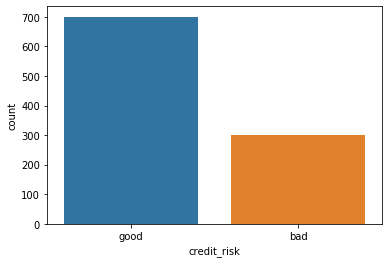

In [12]:
sns.countplot(df['credit_risk'])

##### 70% of the total records have good credit risk and 30% of records have bad credit risk.

______________________

## Univariate Analysis

Let's first visualize the numerical features of our dataset

In [13]:
numerical_columns = ['duration','amount','age']

In [14]:
df[numerical_columns].describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


Skewness of duration: 1.0941841715555418


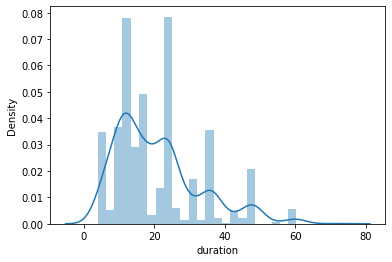

In [15]:
sns.distplot(df['duration'])
print('Skewness of duration:',df['duration'].skew())

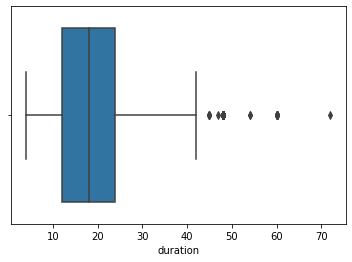

In [16]:
sns.boxplot(df['duration'])

##### Inferences: 
- Only few outliers in 'duration' column.
- Data is right skewed.

Skewness of duration: 1.9495942869127831


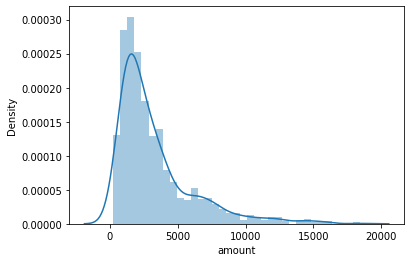

In [17]:
sns.distplot(df['amount'])
print('Skewness of duration:',df['amount'].skew())

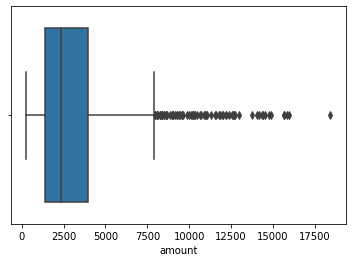

In [18]:
sns.boxplot(df['amount'])

##### Inferences:
- Lot of outliers in 'amount' column.
- Data is highly right skewed.

Skewness of age: 1.0247120249859745


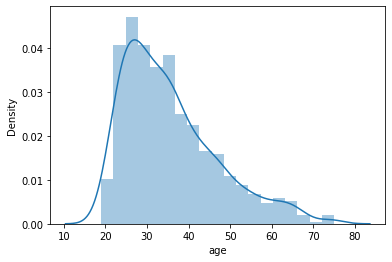

In [19]:
sns.distplot(df['age'])
print('Skewness of age:',df['age'].skew())

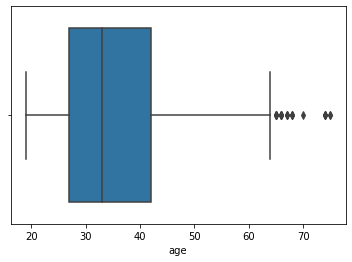

In [20]:
sns.boxplot(df['age'])

##### Inferences:
- Some outliers in 'age' column.
- Data is slightly right skewed. 

Now, let's visualize the categorical features of our dataset

In [21]:
categorical_columns = ['status','credit_history','purpose','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','present_residence','property','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker']

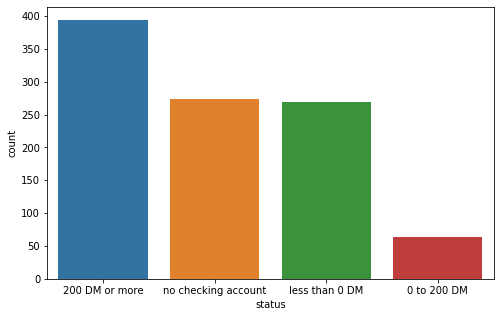

In [22]:
# status
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='status',data=df, order=df['status'].value_counts().index)

#### Inferences:
- 39.4% of records have 200 DM or more balance in checking account
- 27.4% of records have no checking account.
- 26.9% of records have negative balance.
- Only 6.3% of records have balance greater than 0 and less than 200 DM in checing account

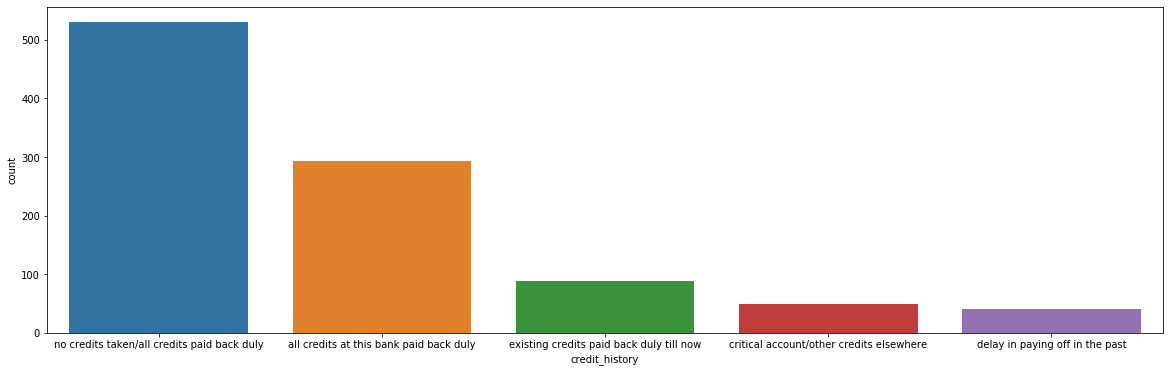

In [23]:
# credit_history
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='credit_history', order=df['credit_history'].value_counts().index, data=df)

#### Inferences:
- 53% of records have either paid back all credits duly or haven't taken any credits.
- 29.3% of records have paid all credits at this bank duly.
- 8.8% of records have paid back exisiting credits duly till now.
- 4.9% of records have critical accounts/other credits elsewhere.
- Only 4% of records had delay in paying off the credit in the past.

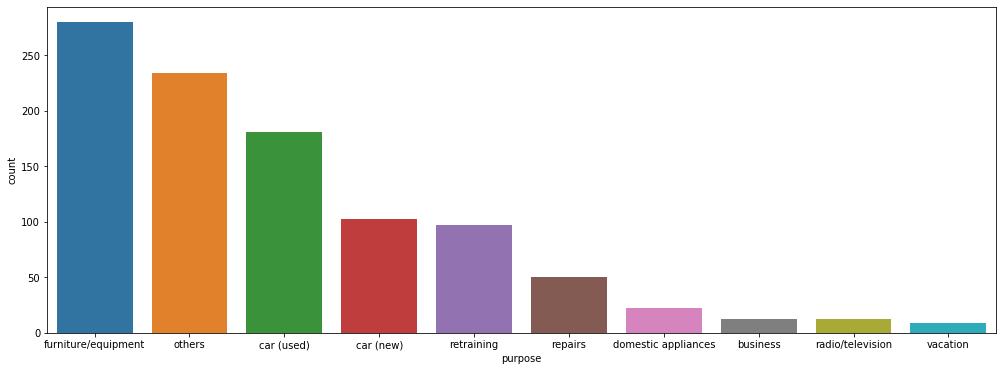

In [24]:
# purpose
fig_dims = (17, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='purpose', order=df['purpose'].value_counts().index, data=df)

#### Inferences:
- Furniture/Equipment accounts for 28% of purpose for which credits are taken.
- Others account for 23.4% of purpose for credits are taken.
- Car (Used) and Car (New) accounts for 18.1% and 10.3% respectively.
- The purpose for each of the remaining categories is less than 10%.

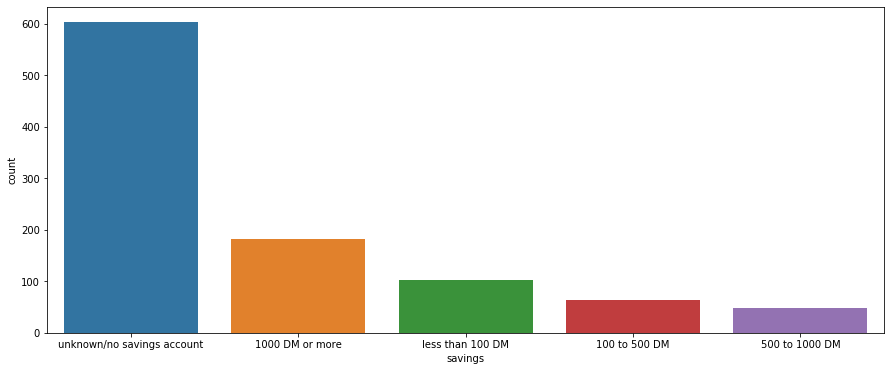

In [25]:
# savings
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='savings', order=df['savings'].value_counts().index,data=df)

#### Inferences:
- More than 60% of records have either no savings accounts or it's unknown.
- 18.3% of records have balance greater than 1000 DM in savings account.
- 10.3% of people have less than 100 DM balance in savings account.
- Only 6.3% of people have balance between 100 to 500 DM and 4.8% people have balance between 500 to 1000 DM.

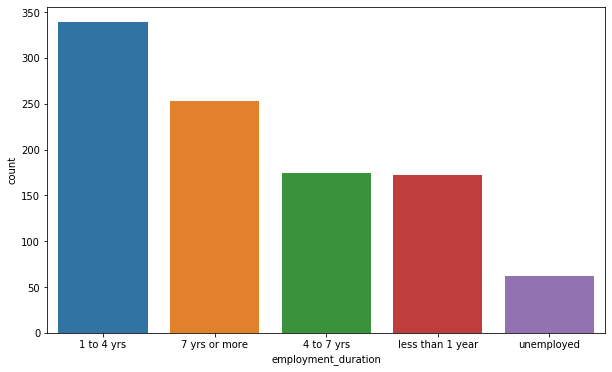

In [26]:
# employment_duration
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='employment_duration', order=df['employment_duration'].value_counts().index,data=df)

##### Inferences:
- 34% of credits are taken by people having 1 to 4 years of employment duration.
- 25.3% of credits are taken by people having employment duration greater than 7 years.
- 17.4% of credits are taken by people between 4 to 7 years of employment duration.
- 17.2% are taken by people with less than 1 year of employment duration.
- Only 6.2% of credits are granted to records who were unemployed.

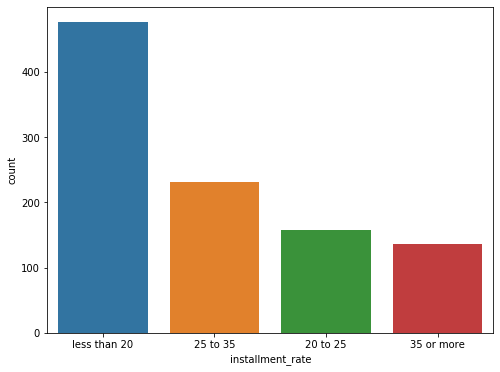

In [27]:
# installment_rate
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='installment_rate', order=df['installment_rate'].value_counts().index, data=df)

##### Inferences:
- 47.6% of people have installment rate less than 20% of their disposable (net) income.
- 23.1% of people have installment rate between 25 to 35% of their disposable income.
- 15.7% of people have installment rate between 20 to 25% of their disposable income.
- 13.6% of records have installment rate greater than 35% of their disposable income. It means high loans are taken by only  13.6% of the people.

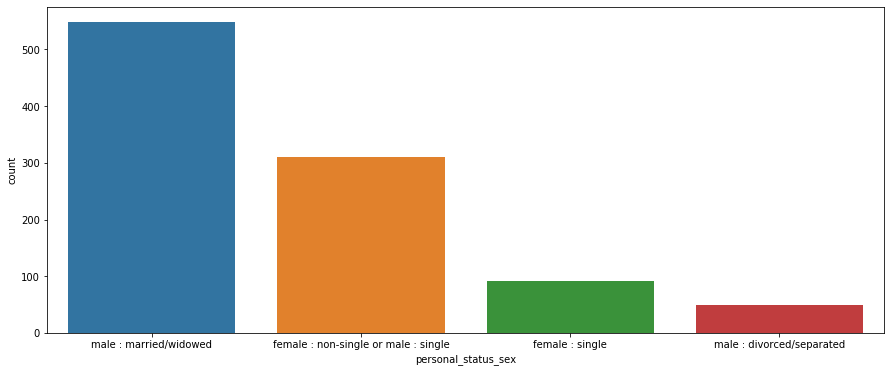

In [28]:
# personal_status_sex
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='personal_status_sex', order=df['personal_status_sex'].value_counts().index, data=df)

##### Inferences:
- 54.8% of credits are taken by males who are either married or widowed.
- 31% of credits are taken by females who are married or males who are single.
- 9.2% of credits are taken by females who are single.
- 5% of credits are taken by males who are divorced/separated.

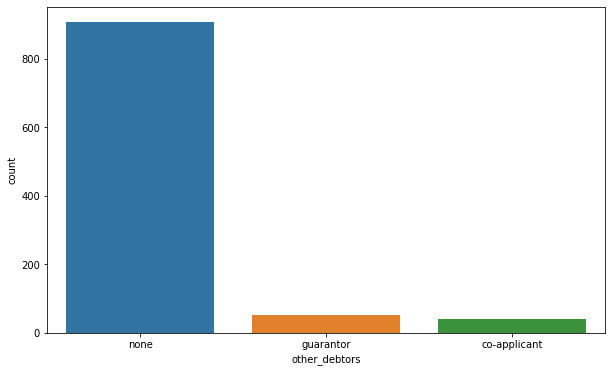

In [29]:
# other_debtors
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='other_debtors', order=df['other_debtors'].value_counts().index, data=df)

In [30]:
df['other_debtors'].value_counts()

none            907
guarantor        52
co-applicant     41
Name: other_debtors, dtype: int64

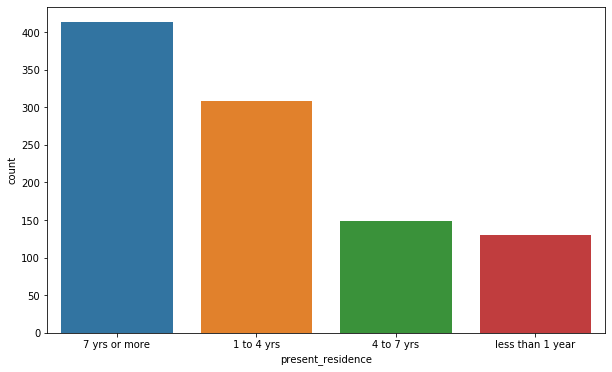

In [31]:
# present_residence
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='present_residence', order=df['present_residence'].value_counts().index, data=df)

##### Inferences:
- 41.3% of credits were granted to people who were living at their present residence for more than 7 years.
- 30.8% of credits were granted to people who were living at their present residence between 1 to 4 years.
- 14.9% of credits were granted to people who were living at their present residence between 4 to 7 years.
- 13% of credits were granted to people who were living at their present residence for less than 1 year.

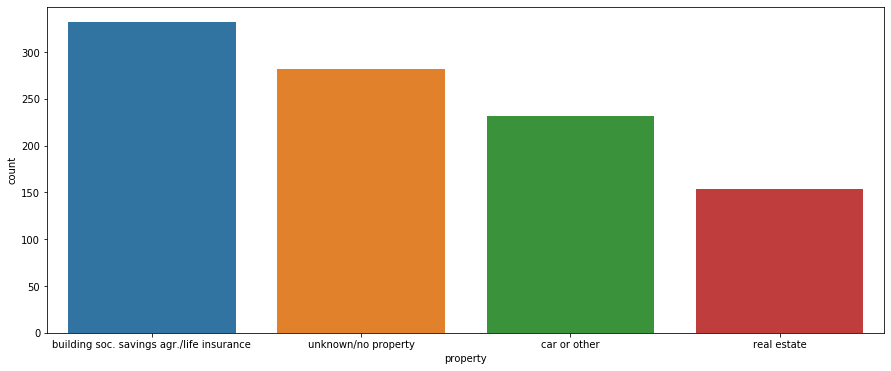

In [32]:
# property
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='property', order=df['property'].value_counts().index, data=df)

##### Inferences:
- 33.2% of credits are given to people who have building society, savings or life insurance as their most valued property.
- 28.2% of credits are given to people who either don't have any property or it's unknown. This is critical as it can lead to bad credit risks.
- 23.2 % of credits are granted to people whose most valued property is car or any other thing.
- 15.4 % of credits are granted to people whose most valued property is real estate.

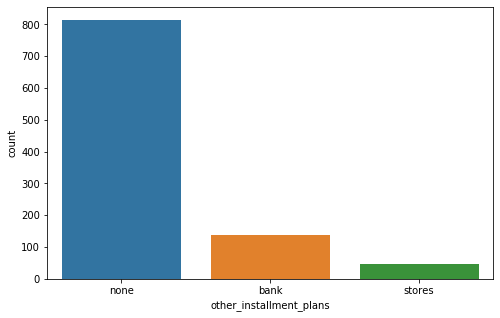

In [33]:
# other_installment_plans
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='other_installment_plans', order=df['other_installment_plans'].value_counts().index, data=df)

##### Inferences:
- 81.4% of records have no other installment plans.
- 13.9% of records have other installment plans going on from banks other than the credit-giving bank.
- 4.7% of records have other installment plans from stores.

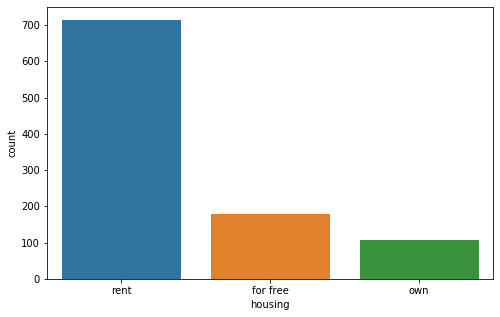

In [34]:
# housing
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='housing', order=df['housing'].value_counts().index, data=df)

##### Inferences:
- 71.4% of people who are granted credits live in rented houses.
- 17.9% of people who are granted credits live in houses for free.
- 10.7% of people who are granted credits live in their own houses.

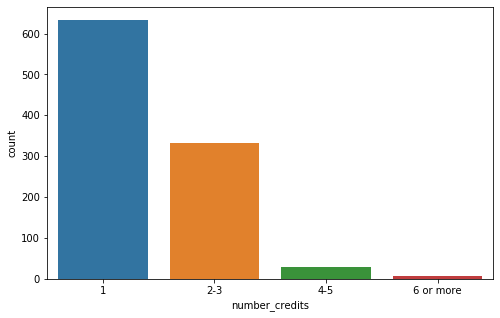

In [35]:
# number_credits
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='number_credits', order=df['number_credits'].value_counts().index, data=df)

##### Inferences:
- 63.3% of records have had only 1 loan at this bank.
- 33.3% of records have had 2 to 3 loans at this bank.
- 2.8% of records have had 4 to 5 loans at this bank.
- Only 0.6% of records have had 6 or more loans at this bank.

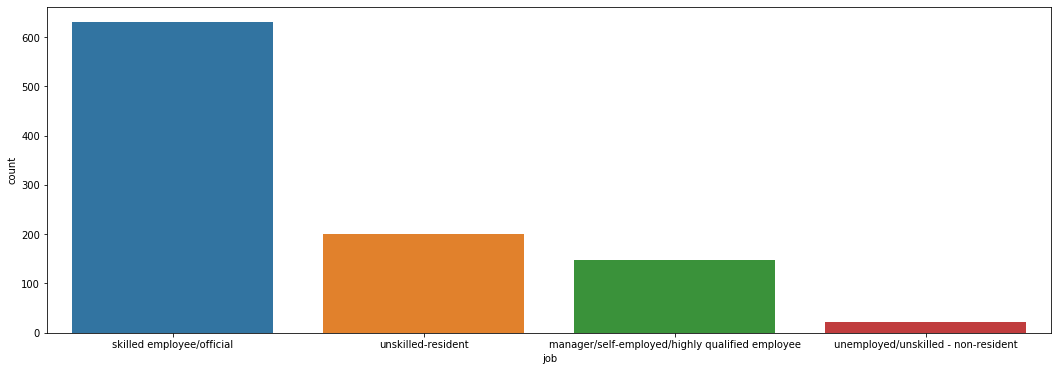

In [36]:
# job
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='job', order=df['job'].value_counts().index, data=df)

##### Inferences:
- 63% of credits are given to debtors who are skilled employees or officials.
- 20% of credits are granted to debtors who are unskilled - resident. It can be potentially risky.
- 14.8% of credits are given to debtors who are managers or self employed or highly qualified employees.
- Only 2.2% of credits are given to debtors who are unemployed/unskilled and non-resident.

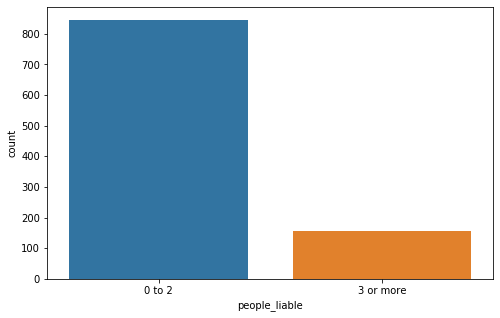

In [37]:
# people_liable
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='people_liable', order=df['people_liable'].value_counts().index, data=df)

##### Inferences:
- 84.5% records have 0 to 2 people liable i.e., people who are financially dependent on debtor.
- 15.5% of records have 3 or more people liable i.e., people who are financially dependent on debtor.

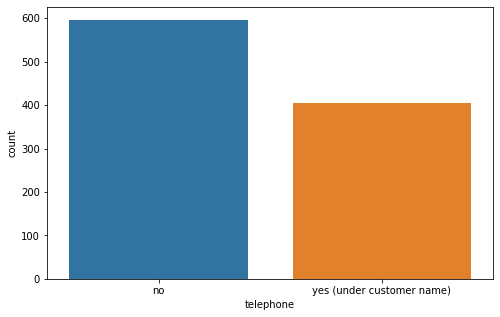

In [38]:
# telephone
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='telephone', order=df['telephone'].value_counts().index, data=df)

##### Inferences:
- 59.6% of records have a landline telephone registered on debtor's name.
- 40.4% of records don't have any a landline telephone registered on debtor's name.

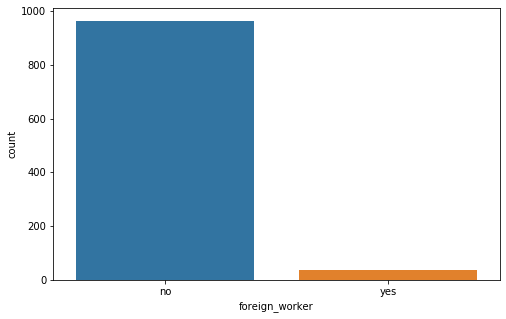

In [39]:
# foreign_worker
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='foreign_worker', order=df['foreign_worker'].value_counts().index, data=df)

##### Inferences:
- 96.3% of credits are taken by people who aren't foreign workers.
- Only 3.7% of credits are taken by foreign workers.

## Bivariate Analysis

##### Let's see the bivariate analyis of numerical features

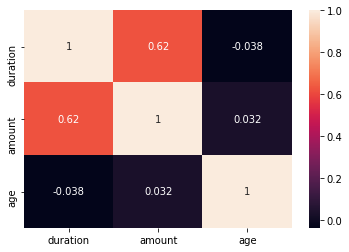

In [40]:
sns.heatmap(df[numerical_columns].corr(), annot=True)

##### Inferences:
- High positive correlation between duration and amount.
- Low positive correlation between amount and age.
- Low negative correlation between duration and age.

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vf = [vif(df[numerical_columns].values, i ) for i in range(df[numerical_columns].shape[1])]
pd.DataFrame(vf, index=numerical_columns, columns= ["vif"])

,vif
duration,5.532347
amount,3.862073
age,3.064870


Now, let's see how the data is scattered among different numerical columns

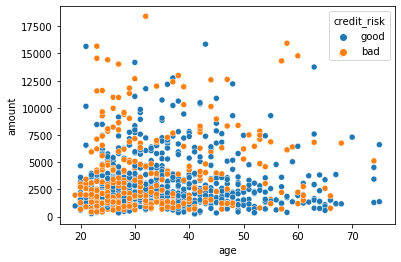

In [42]:
sns.scatterplot('age','amount',data=df,hue='credit_risk')

##### Inference:
- Most of the bad credit risks lie in the age of 20 to 60 years.
- The amount for these bad credit risks lie in the range of 0 to 12500 DM.

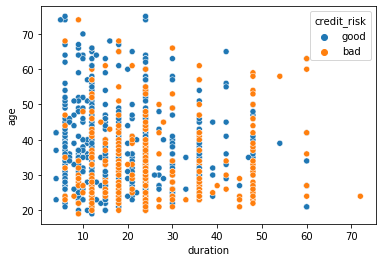

In [43]:
sns.scatterplot('duration','age',data=df,hue='credit_risk')

##### Inference:
- Most of the bad credit risks have duration of at least 12 months and go upto 60 months.
- Most of these bad credit risks is between 20 to 60 years of age.

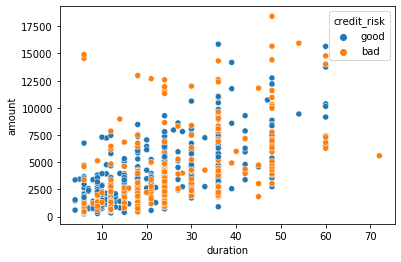

In [44]:
sns.scatterplot('duration','amount',data=df,hue='credit_risk')

##### Inferences:
- Most of the bad credit risks have duration of at least 12 months and go upto 60 months.
- As the duration for bad credit risks increases, the amount also increases.

Let's check the distribution plots of the numerical features for good and bad credit risks

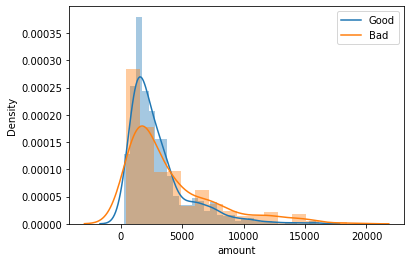

In [45]:
sns.distplot(df[df['credit_risk']=='good']['amount'])
sns.distplot(df[df['credit_risk']=='bad']['amount'])
plt.legend(['Good','Bad'])

##### Inference:
- Amount for most of the good and bad credit risk records lie between 0 to 5000 DM
- Overlapping is quite large, but the peak of good credit risk records is higher than the bad ones, so it seems like the mean amount for good credit risk records is greater than that of bad credit risk records.

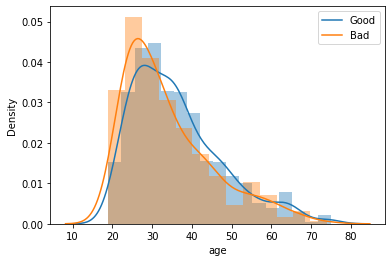

In [46]:
sns.distplot(df[df['credit_risk']=='good']['age'])
sns.distplot(df[df['credit_risk']=='bad']['age'])
plt.legend(['Good','Bad'])

##### Inference:
- Age for most of the good and bad credit risks lie in the range of 20 to 60 years.
- Overlapping is large, so it looks like mean age for good credit risk records and bad credit risk records is almost equal.

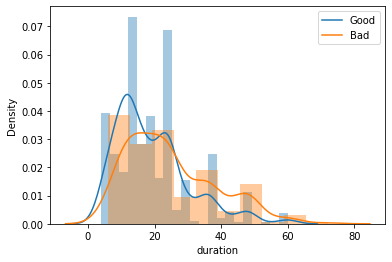

In [47]:
sns.distplot(df[df['credit_risk']=='good']['duration'])
sns.distplot(df[df['credit_risk']=='bad']['duration'])
plt.legend(['Good','Bad'])

##### Inference:
- Duration for most of the good and bad credit risks lie in the range of around 9 to 50 months.
- Overlapping is less, so it seems like mean age for good credit risk records and bad credit risk differs significantly.

Let's check the box plots of the numerical features for good and bad credit risks

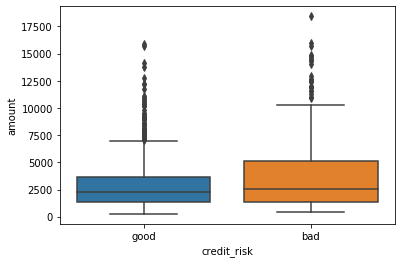

In [48]:
sns.boxplot(x='credit_risk',y='amount',data=df)

##### Inferences:
- Median for bad credit risk records is almost same as the median for good credit risk records.
- IQR for bad credit risk records is greater than IQR of good credit risk records.

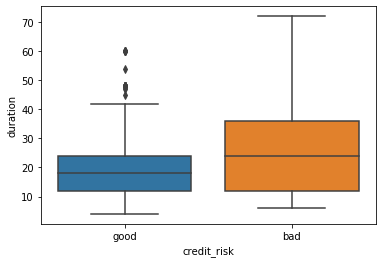

In [49]:
sns.boxplot(x='credit_risk',y='duration',data=df)

##### Inferences:
- Median for bad credit risk records is greater than the median for good credit risk records.
- IQR for bad credit risk records is greater than IQR of good credit risk records.

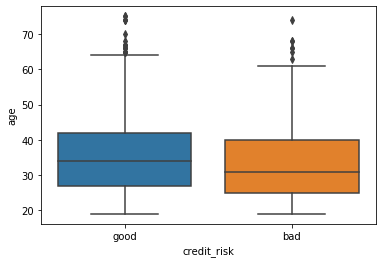

In [50]:
sns.boxplot(x='credit_risk',y='age',data=df)

##### Inference:
- Median for bad credit risk records is lesser than the median for good credit risk records.
- IQR for bad credit risk records is almost same as IQR of good credit risk records.

##### Let's see bivariate analysis of categorical columns

In [51]:
categorical_columns = ['status','credit_history','purpose','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','present_residence','property','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk']

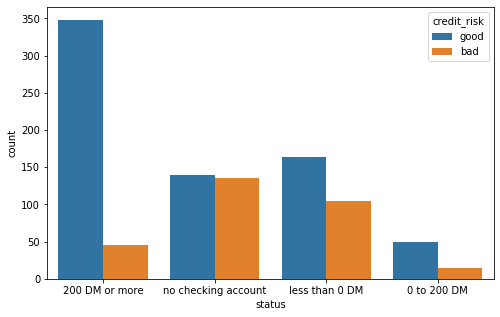

In [52]:
# status
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='status',data=df, order=df['status'].value_counts().index, hue='credit_risk')

In [53]:
df[df['credit_risk'] == 'bad']['status'].value_counts().values[:2].sum()/300 * 100

80.0

#### Inferences:
- 80% of the bad credit risks happened in case of people having no checking account or having negative balance.

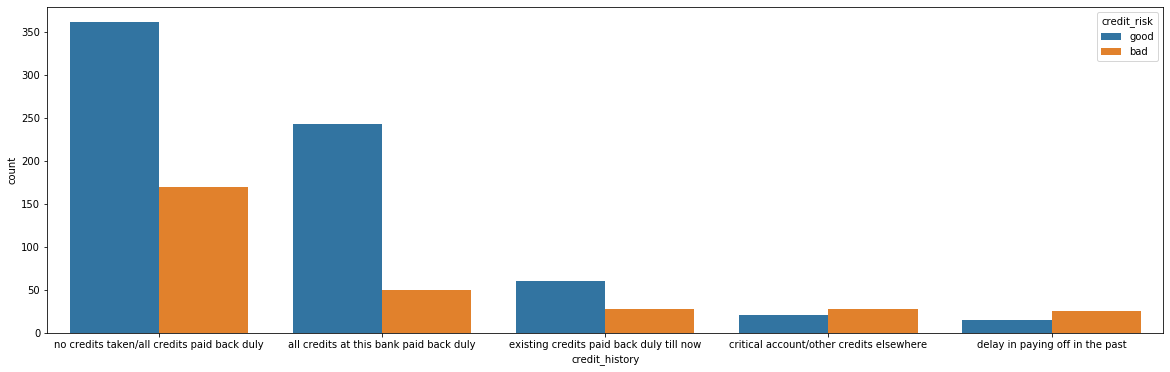

In [54]:
# credit_history
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='credit_history', order=df['credit_history'].value_counts().index, data=df, hue='credit_risk')

In [55]:
df[df['credit_risk'] == 'bad']['credit_history'].value_counts().values[0]/300 * 100

56.333333333333336

#### Inferences:
- 56.3% of bad credit risk cases happened in case of people who have paid back all previous credits duly or who haven't taken credits from this bank. It's kind of strange.

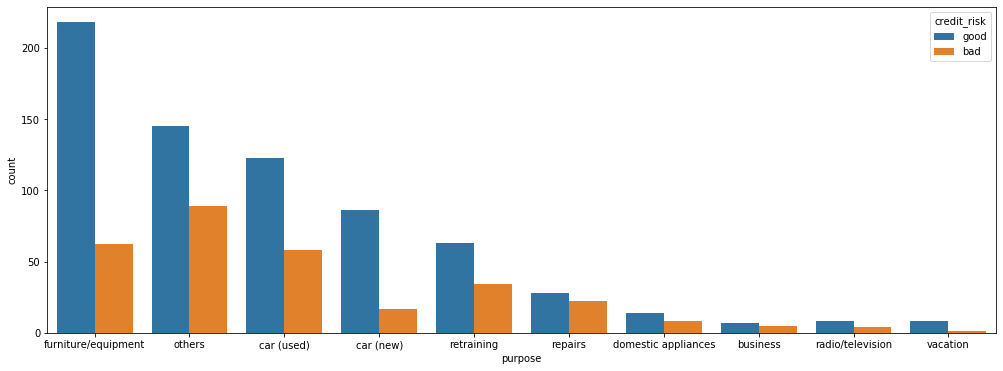

In [56]:
# purpose
fig_dims = (17, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='purpose', order=df['purpose'].value_counts().index, data=df, hue='credit_risk')

In [57]:
df[df['credit_risk'] == 'bad']['purpose'].value_counts().values[:3].sum()/ 300 * 100

69.66666666666667

#### Inferences:
- 75.3% of bad credit risk cases have purpose as car (used or new) or some other reasons.

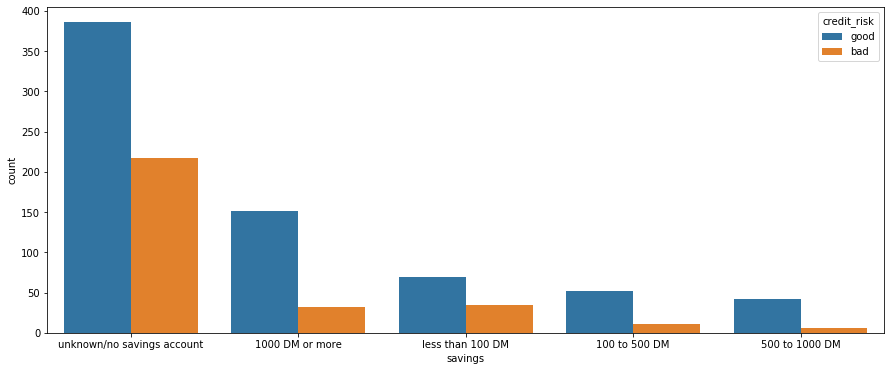

In [58]:
# savings
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='savings', order=df['savings'].value_counts().index,data=df, hue='credit_risk')

In [59]:
df[df['credit_risk'] == 'bad']['savings'].value_counts().values[0]/ 300 * 100

72.33333333333334

#### Inferences:
- 72.3% of bad credit risk cases have no savings account or it's unkwown. So, savings account seems to be a crucial feature.

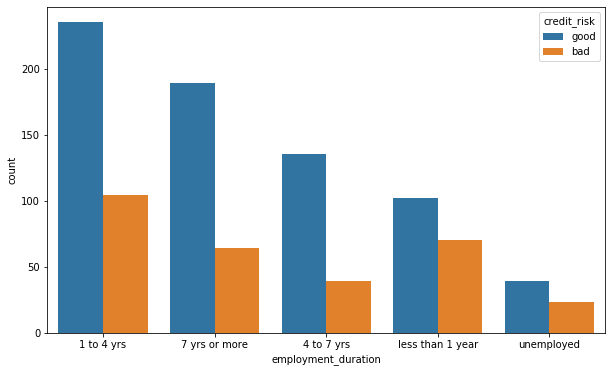

In [60]:
# employment_duration
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='employment_duration', order=df['employment_duration'].value_counts().index,data=df, hue='credit_risk')

In [61]:
df[df['credit_risk'] == 'bad']['employment_duration'].value_counts().values[:2].sum()/ 300 * 100

57.99999999999999

##### Inferences:
- 58% of bad credit risk cases happened for people having employment duration either less than 1 year or 1 to 4 years. It means most of these are younger people who are in their early career stage.

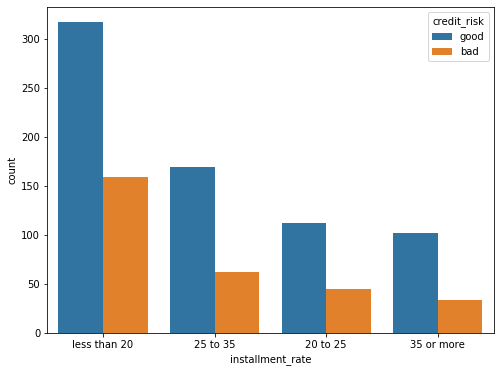

In [62]:
# installment_rate
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='installment_rate', order=df['installment_rate'].value_counts().index, data=df, hue='credit_risk')

In [63]:
df[df['credit_risk'] == 'bad']['installment_rate'].value_counts().values[0]/300 * 100

53.0

##### Inferences:
- 53% of bad credit risk cases happened for people having installment rate less than 20% of their net income. It means people who have even lesser installment rate are turning out be a bad credit risk. It's because their net income may be very low that's why they can't repay the loans.

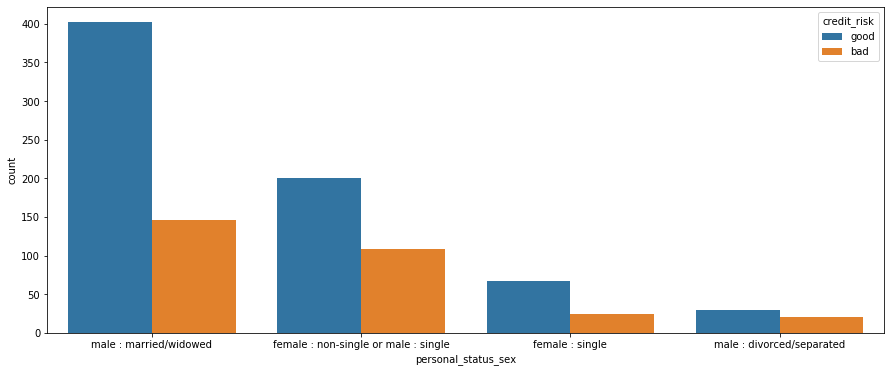

In [64]:
# personal_status_sex
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='personal_status_sex', order=df['personal_status_sex'].value_counts().index, data=df, hue='credit_risk')

In [65]:
df[df['credit_risk'] == 'bad']['personal_status_sex'].value_counts().values[0] / 300 * 100

48.66666666666667

##### Inferences:
- 48.6% of bad credit risk cases happened in case of males who are either married or widowed.

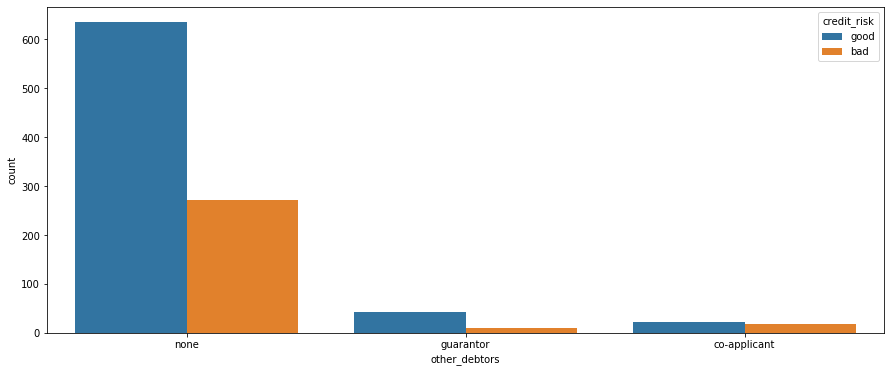

In [66]:
# other_debtors
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='other_debtors', order=df['other_debtors'].value_counts().index, data=df, hue='credit_risk')

In [67]:
df[df['credit_risk'] == 'bad']['other_debtors'].value_counts().values[0] / 300 * 100

90.66666666666666

##### Inferences:
- 90.67% of bad credit risk cases happened in case of people who have no other debtor. It means they were the single borrower of the credit.

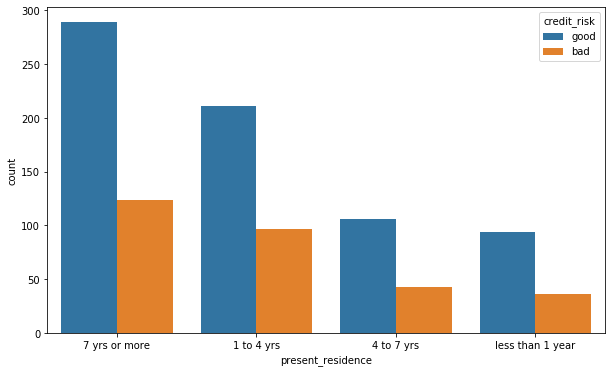

In [68]:
# present_residence
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='present_residence', order=df['present_residence'].value_counts().index, data=df, hue='credit_risk')

In [69]:
df[df['credit_risk'] == 'bad']['present_residence'].value_counts().values[:2].sum() / 300 * 100

73.66666666666667

##### Inferences:
- 73.6% of bad credit risk cases happen for people who are living in their present residence for either 1 to 4 years or greater than 7 years. It doesn't indicate anything clearly.

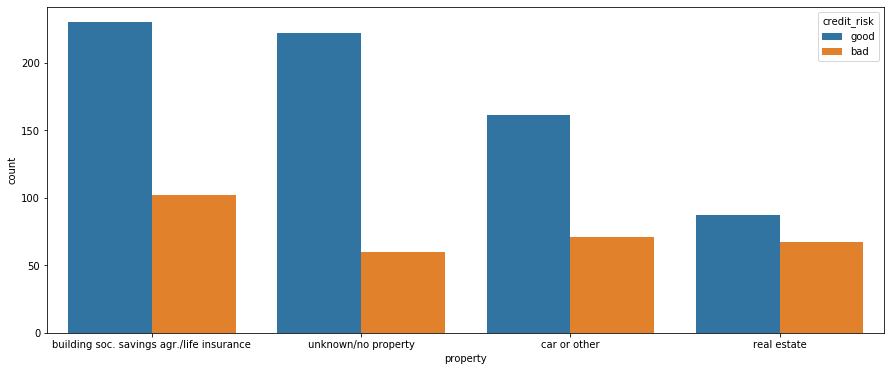

In [70]:
# property
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='property', order=df['property'].value_counts().index, data=df, hue='credit_risk')

In [71]:
print(df[df['credit_risk'] == 'bad']['property'].value_counts().values[0] /300 * 100)
print(df[df['credit_risk'] == 'bad']['property'].value_counts().values[1] /300 * 100)

34.0
23.666666666666668


##### Inferences:
- 34% of bad credit risk cases have their most valued property as bulding society / savings or life insurance.
- 23.6% of of bad credit risk cases have their most valued property as car or something else.

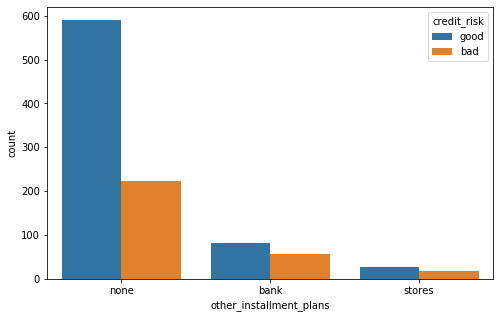

In [72]:
# other_installment_plans
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='other_installment_plans', order=df['other_installment_plans'].value_counts().index, data=df, hue='credit_risk')

In [73]:
df[df['credit_risk'] == 'bad']['other_installment_plans'].value_counts().values[0] / 300 * 100

74.66666666666667

##### Inferences:
- Around 75% of bad credit risk cases happened in case of people who didn't have any other installment plans going on except this bank. It's also kind of strange.

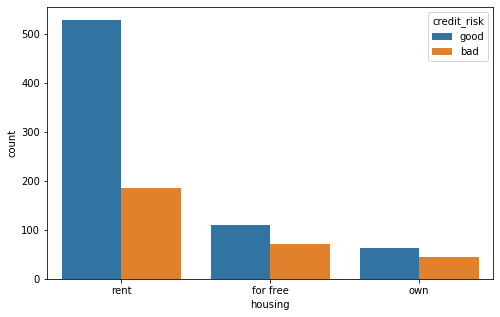

In [74]:
# housing
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='housing', order=df['housing'].value_counts().index, data=df, hue='credit_risk')

In [75]:
df[df['credit_risk'] == 'bad']['housing'].value_counts().values[0] / 300 * 100

62.0

##### Inferences:
- 62% of bad credit risk cases have their housing as rent. It means people who live in rented houses are more likely to turn out to be a defaulter.

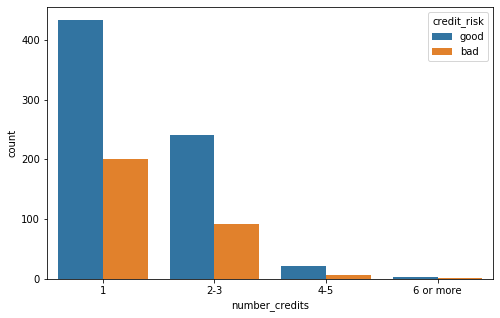

In [76]:
# number_credits
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='number_credits', order=df['number_credits'].value_counts().index, data=df, hue='credit_risk')

In [77]:
df[df['credit_risk'] == 'bad']['number_credits'].value_counts().values[0] / 300 * 100

66.66666666666666

##### Inferences:
- 66.67% of bad credit risk cases have taken only 1 credit from this bank.

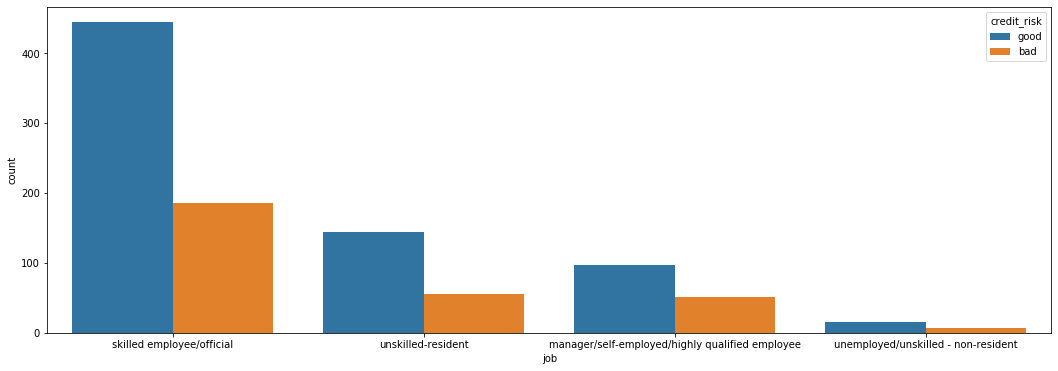

In [78]:
# job
fig_dims = (18, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='job', order=df['job'].value_counts().index, data=df, hue='credit_risk')

In [79]:
df[df['credit_risk'] == 'bad']['job'].value_counts().values[0] / 300 * 100

62.0

##### Inferences:
- 62% of bad credit risk cases happened with people who are skilled employees or officials. It's kind of strange that these people turned out to be defaulters.

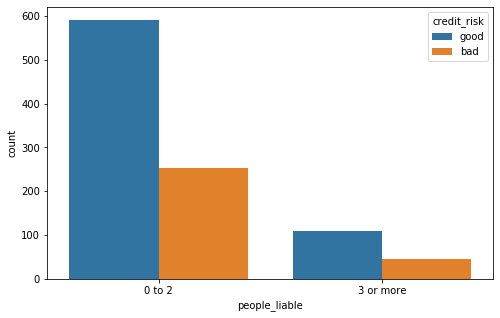

In [80]:
# people_liable
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='people_liable', order=df['people_liable'].value_counts().index, data=df, hue='credit_risk')

In [81]:
df[df['credit_risk'] == 'bad']['people_liable'].value_counts().values[0] /300 * 100

84.66666666666667

##### Inferences:
- 84.6% of total bad credit risk cases have 0 to 2 people dependent on the debtor.

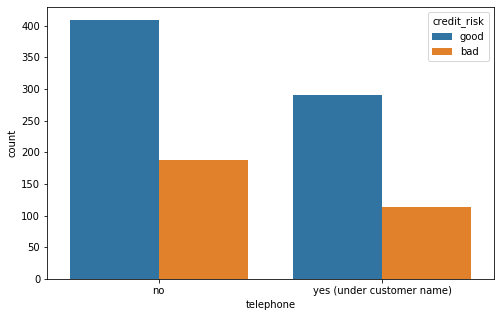

In [82]:
# telephone
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='telephone', order=df['telephone'].value_counts().index, data=df, hue='credit_risk')

In [83]:
df[df['credit_risk'] == 'bad']['telephone'].value_counts()

no                           187
yes (under customer name)    113
Name: telephone, dtype: int64

##### Inferences:
- 62.33% of bad credit risk records don't have landline telephone registered on debtor's name while 37.67% records have landline telephone registered on debtor's name. It doesn't indicate anything clearly.

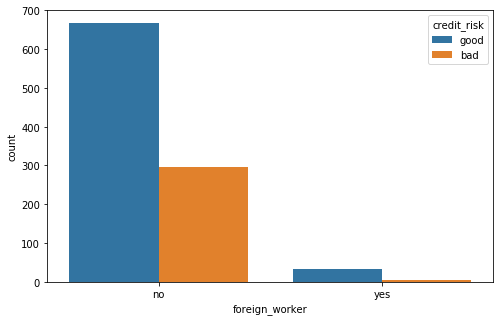

In [84]:
# foreign_worker
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='foreign_worker', order=df['foreign_worker'].value_counts().index, data=df, hue='credit_risk')

In [85]:
df[df['credit_risk'] == 'bad']['foreign_worker'].value_counts()

no     296
yes      4
Name: foreign_worker, dtype: int64

##### Inferences:
- 98.67% of bad credit risk cases happened with people who aren't foreign workers.

##### Clubbing together of categories having very low percentage of values in different categorical columns

In [86]:
# number_credits

In [87]:
df['number_credits'].value_counts()

1            633
2-3          333
4-5           28
6 or more      6
Name: number_credits, dtype: int64

In [88]:
df['number_credits'] = df['number_credits'].apply(lambda x: '4 or more' if x=='4-5' or x=='6 or more' else x)

In [89]:
df['number_credits'].value_counts()

1            633
2-3          333
4 or more     34
Name: number_credits, dtype: int64

In [90]:
# purpose

In [91]:
df['purpose'].value_counts()

furniture/equipment    280
others                 234
car (used)             181
car (new)              103
retraining              97
repairs                 50
domestic appliances     22
business                12
radio/television        12
vacation                 9
Name: purpose, dtype: int64

In [92]:
df['purpose'] = df['purpose'].replace({'domestic appliances':'domestic appliances or radio/television',
                                      'radio/television':'domestic appliances or radio/television',
                                      'business':'business or vacation',
                                      'vacation':'business or vacation',
                                      'retraining':'retraining or repairs',
                                      'repairs':'retraining or repairs',
                                      'car (new)':'car (new) or car (used)',
                                      'car (used)':'car (new) or car (used)'})

In [93]:
df['purpose'].value_counts()

car (new) or car (used)                    284
furniture/equipment                        280
others                                     234
retraining or repairs                      147
domestic appliances or radio/television     34
business or vacation                        21
Name: purpose, dtype: int64

In [94]:
# savings

In [95]:
df['savings'].value_counts()

unknown/no savings account    603
1000 DM or more               183
less than 100 DM              103
100 to 500 DM                  63
500 to 1000 DM                 48
Name: savings, dtype: int64

In [96]:
df['savings'] = df['savings'].apply(lambda x: '100 to 1000 DM' if x=='100 to 500 DM' or x=='500 to 1000 DM' else x)

In [97]:
df['savings'].value_counts()

unknown/no savings account    603
1000 DM or more               183
100 to 1000 DM                111
less than 100 DM              103
Name: savings, dtype: int64

In [98]:
# job

In [99]:
df['job'].value_counts()

skilled employee/official                          630
unskilled-resident                                 200
manager/self-employed/highly qualified employee    148
unemployed/unskilled - non-resident                 22
Name: job, dtype: int64

In [100]:
df['job'] = df['job'].apply(lambda x: 'unskilled-resident or unemployed/unskilled non-resident' if x=='unskilled-resident' or x=='unemployed/unskilled - non-resident' else x)

In [101]:
df['job'].value_counts()

skilled employee/official                                  630
unskilled-resident or unemployed/unskilled non-resident    222
manager/self-employed/highly qualified employee            148
Name: job, dtype: int64

#### Converting the columns having ordinal values to numerical codes.

In [102]:
status = {'no checking account':1, 'less than 0 DM':2, '0 to 200 DM':3, '200 DM or more':4}
df['status'] = df['status'].map(status)

savings = {'unknown/no savings account':1, 'less than 100 DM':2, '100 to 1000 DM':3, '1000 DM or more':4}
df['savings'] = df['savings'].map(savings)

employment_duration = {'unemployed':1 ,'less than 1 year':2, '1 to 4 yrs':3, '4 to 7 yrs':4, '7 yrs or more':5}
df['employment_duration'] = df['employment_duration'].map(employment_duration)

installment_rate = {'less than 20':1, '20 to 25':2, '25 to 35':3, '35 or more':4}
df['installment_rate'] = df['installment_rate'].map(installment_rate)

present_residence = {'less than 1 year':1, '1 to 4 yrs':2, '4 to 7 yrs':3, '7 yrs or more':4}
df['present_residence'] = df['present_residence'].map(present_residence)

number_credits = {'1':1, '2-3':2, '4 or more':3}
df['number_credits'] = df['number_credits'].map(number_credits)

people_liable = {'0 to 2':1, '3 or more':2}
df['people_liable'] = df['people_liable'].map(people_liable)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   int64 
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   int64 
 6   employment_duration      1000 non-null   int64 
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

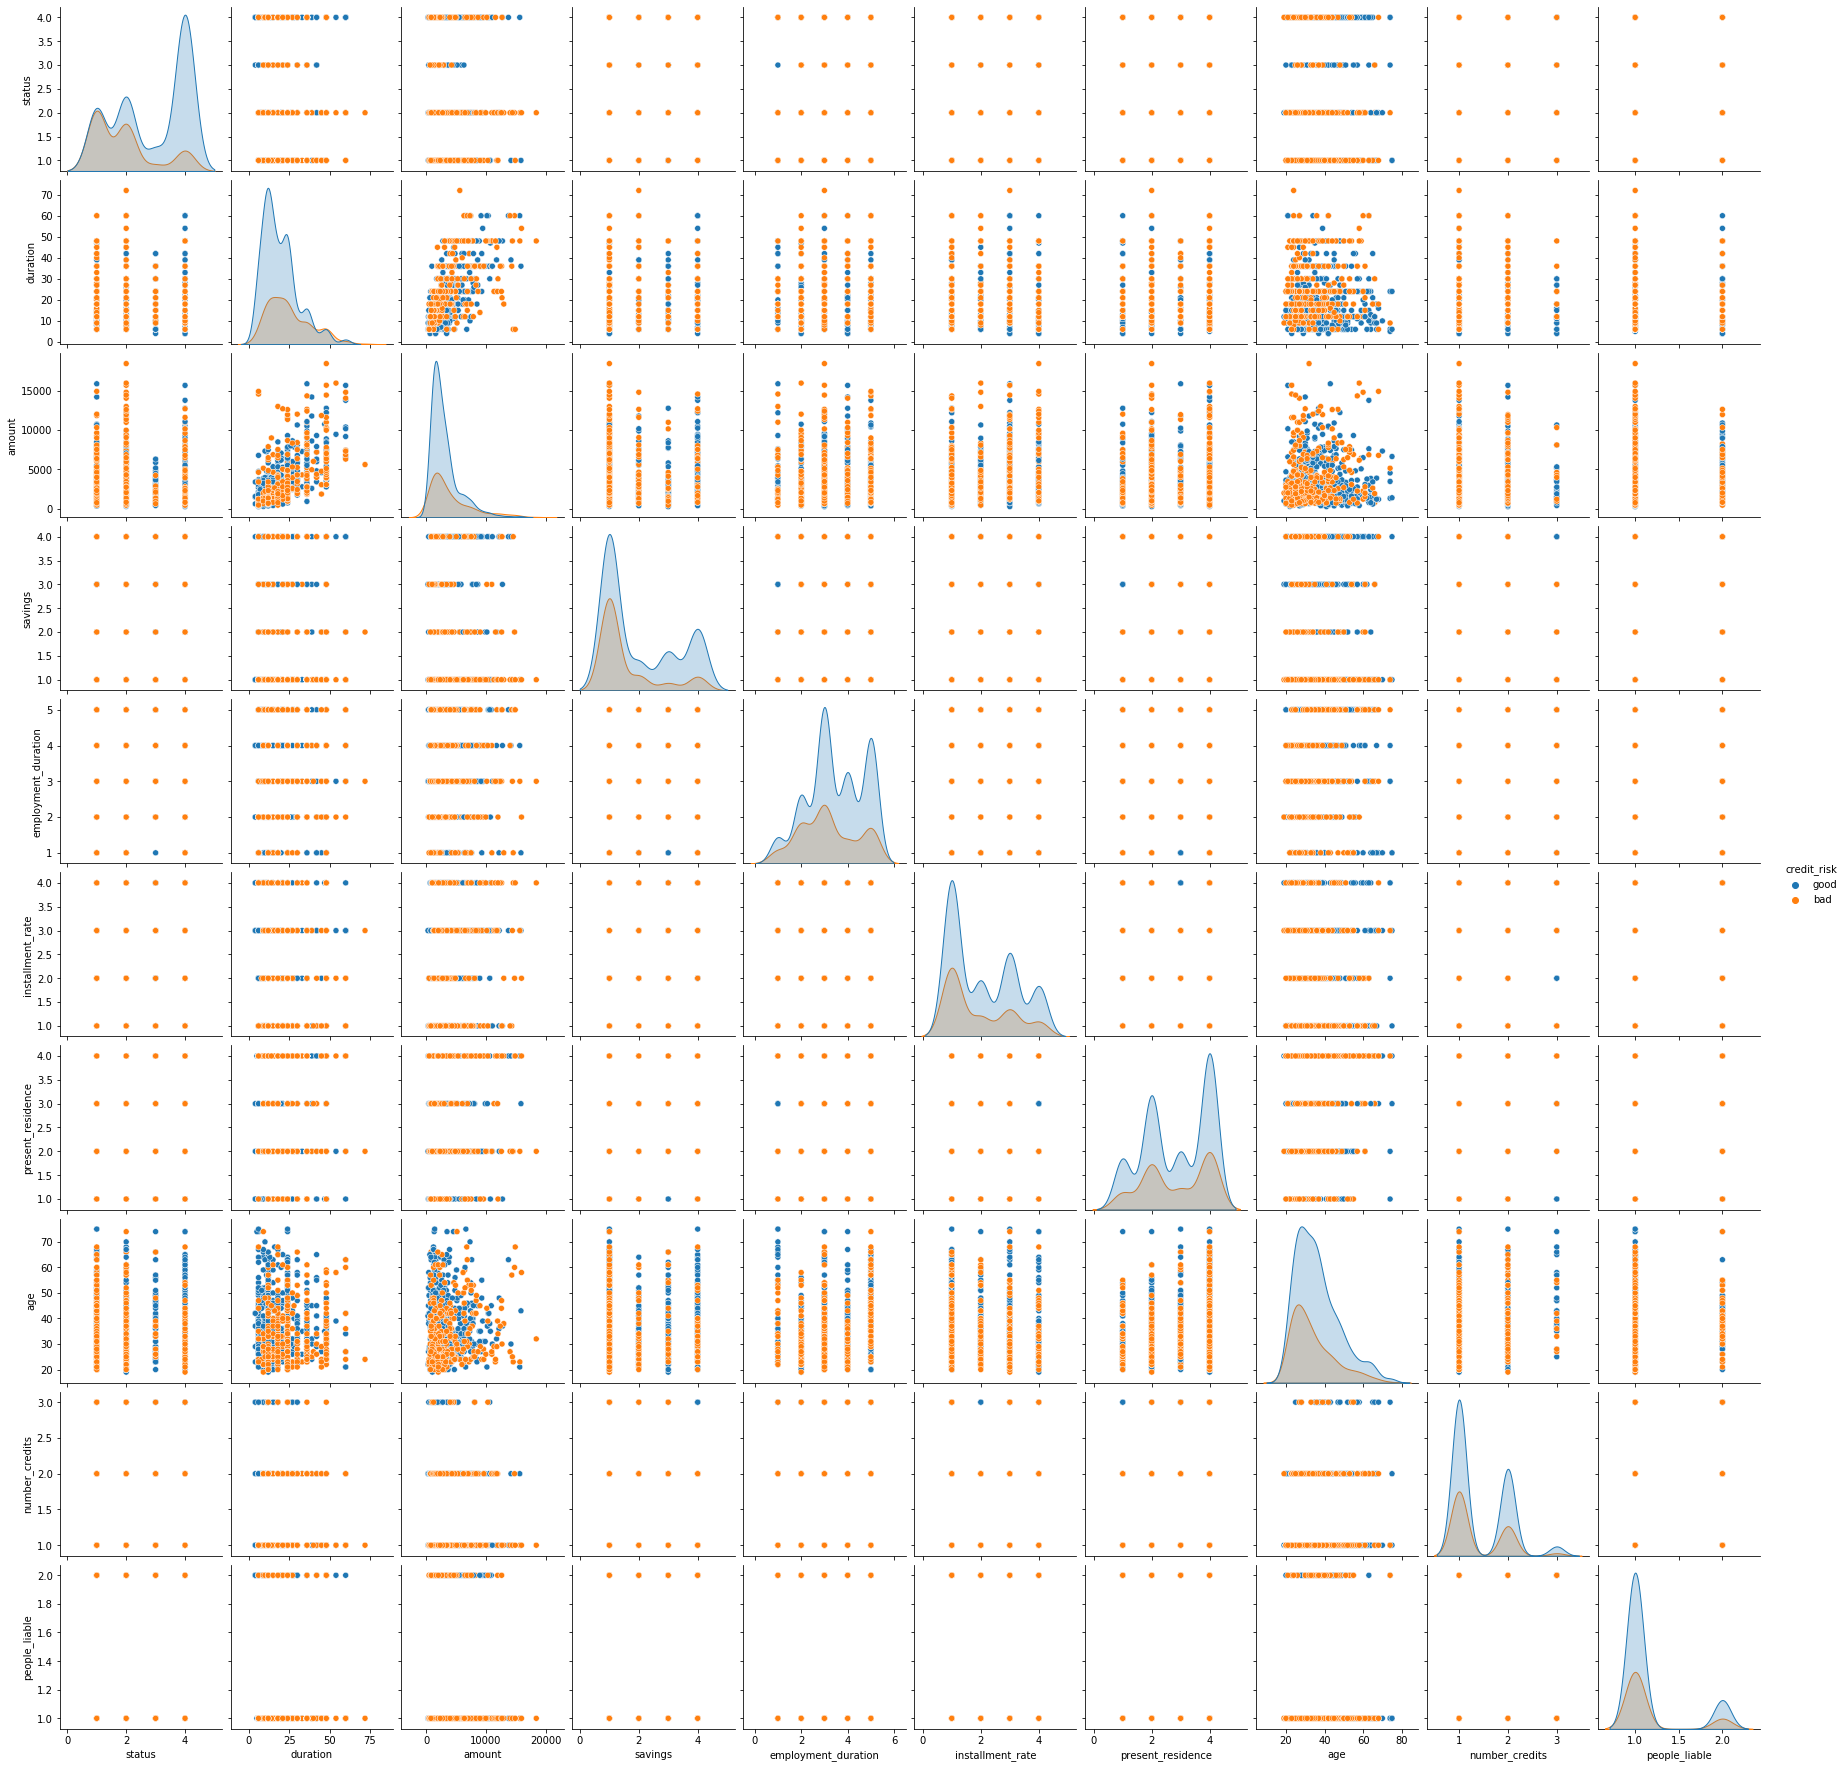

In [104]:
sns.pairplot(df,hue='credit_risk')

# Outlier Treatment

### Power Transformer

In [105]:
from sklearn.preprocessing import PowerTransformer

In [106]:
df_continuous = df[numerical_columns]
df_continuous.head()

,duration,amount,age
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38


In [107]:
pt = PowerTransformer(method='box-cox')
power_transformed_array = pt.fit_transform(df_continuous)

In [108]:
ptdf_cont = pd.DataFrame(data = power_transformed_array, columns = df_continuous.columns)
ptdf_cont.head()

,duration,amount,age
0,-0.004054,-1.079443,-1.824686
1,-1.160984,0.215350,0.295513
2,-0.689848,-1.382388,-1.412590
3,-0.689848,-0.141779,0.551504
4,-0.689848,-0.112096,0.469891


##### Now, let's see the boxplots and distriubution plots of numerical feaatures after PowerTransformation

skewness of  duration : -0.010184004451953547


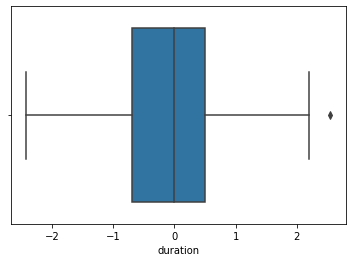

skewness of  amount : 0.005385997526575357


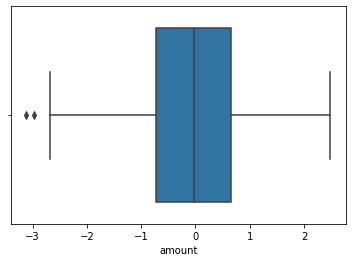

skewness of  age : 0.052772473444366946


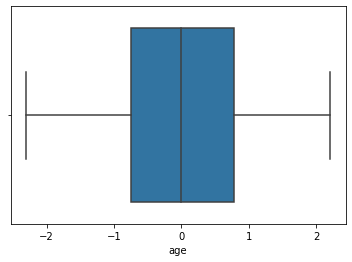

In [109]:
for i in ptdf_cont.columns:
    sns.boxplot(ptdf_cont[i])
    print("skewness of ",i,":",ptdf_cont[i].skew())
    plt.show()  

skewness of  duration : -0.010184004451953547


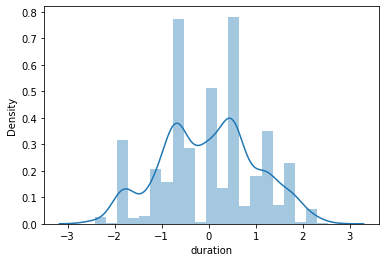

skewness of  amount : 0.005385997526575357


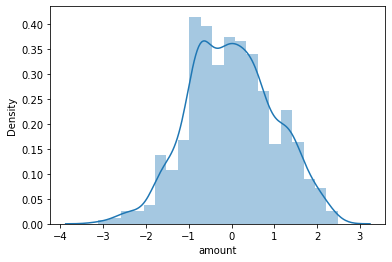

skewness of  age : 0.052772473444366946


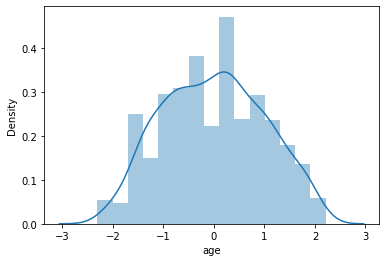

In [110]:
for i in ptdf_cont.columns:
    sns.distplot(ptdf_cont[i])
    print("skewness of ",i,":",ptdf_cont[i].skew())
    plt.show()  

In [111]:
ptdf = df.copy()

for col in ptdf_cont.columns:
    ptdf[col] = ptdf_cont[col]

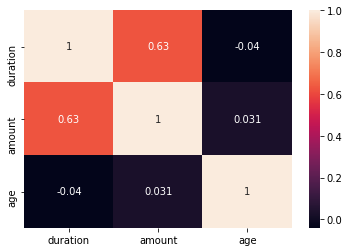

In [112]:
sns.heatmap(ptdf[numerical_columns].corr(),annot=True)

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vf = [vif(ptdf[numerical_columns].values, i ) for i in range(ptdf[numerical_columns].shape[1])]
pd.DataFrame(vf, index=numerical_columns, columns= ["vif"])

,vif
duration,1.655537
amount,1.654510
age,1.006850


# Statistical Significance

### 1. Chi-Square Test

##### Applying Chi-Square Contingency Test on categorical features to check their significance

In [114]:
from scipy.stats import chi2_contingency, ttest_ind

In [115]:
def contingency_table(feature):
    p = pd.crosstab(df['credit_risk'],df[feature])
    return(p)

In [116]:
feature = []
pval = []
chi2_result = []

for i in categorical_columns[:-1]:
    feature.append(i)
    result = chi2_contingency(contingency_table(i))
    pval.append(round(float(result[1]),6))
    
    if float(result[1]) < 0.05:
        chi2_result.append("Significant")
    else:
        chi2_result.append("Insignificant")
    

In [117]:
chisquare = pd.DataFrame(data={'PValue':pval,'Result':chi2_result},index=feature)
chisquare

,PValue,Result
status,0.000000,Significant
credit_history,0.000000,Significant
purpose,0.000473,Significant
savings,0.000000,Significant
employment_duration,0.001045,Significant
installment_rate,0.140033,Insignificant
personal_status_sex,0.022238,Significant
other_debtors,0.036056,Significant
present_residence,0.861552,Insignificant
property,0.000029,Significant


### 2. T-Test of Independence

In [118]:
def t_test(mydf,columns):    
    feature = []
    pval = []
    ttest_result = []
    
    for i in columns:
        feature.append(i)
        result = ttest_ind(mydf[mydf["credit_risk"]=="good"][i], mydf[mydf["credit_risk"]=="bad"][i])
        pval.append(round(float(result[1]),6))
        
        if float(result[1]) < 0.05:
            ttest_result.append("Significant")
        else:
            ttest_result.append("Insignificant")
    
    return(pd.DataFrame(index=feature,data={'PValue':pval,'Result':ttest_result}))

##### Now, applying T-Test on Power Transformed data

In [119]:
pt_ttest = t_test(ptdf, numerical_columns)
pt_ttest

,PValue,Result
duration,0.000000,Significant
amount,0.000775,Significant
age,0.000517,Significant


## One Hot Encoding

##### Now, let's first apply one hot encoding on Power Transformed DataFrame

In [120]:
ptdf.shape

(1000, 21)

In [121]:
ptdf = ptdf.drop(columns = chisquare[chisquare['Result'] == 'Insignificant'].index, axis=1)

In [122]:
ptdf.shape

(1000, 15)

In [123]:
ptdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   status                   1000 non-null   int64  
 1   duration                 1000 non-null   float64
 2   credit_history           1000 non-null   object 
 3   purpose                  1000 non-null   object 
 4   amount                   1000 non-null   float64
 5   savings                  1000 non-null   int64  
 6   employment_duration      1000 non-null   int64  
 7   personal_status_sex      1000 non-null   object 
 8   other_debtors            1000 non-null   object 
 9   property                 1000 non-null   object 
 10  age                      1000 non-null   float64
 11  other_installment_plans  1000 non-null   object 
 12  housing                  1000 non-null   object 
 13  foreign_worker           1000 non-null   object 
 14  credit_risk              

In [124]:
pt_ohe_df = pd.get_dummies(ptdf, columns = ptdf.drop('credit_risk',axis=1).select_dtypes(include='object').columns, drop_first=True)
pt_ohe_df.head()

,status,duration,amount,savings,employment_duration,age,credit_risk,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,...,other_debtors_guarantor,other_debtors_none,property_car or other,property_real estate,property_unknown/no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,foreign_worker_yes
0,1,-0.004054,-1.079443,1,2,-1.824686,good,0,0,0,...,0,1,1,0,0,1,0,0,0,0
1,1,-1.160984,0.215350,1,3,0.295513,good,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2,-0.689848,-1.382388,2,4,-1.412590,good,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,1,-0.689848,-0.141779,1,3,0.551504,good,0,0,0,...,0,1,0,0,1,1,0,0,0,1
4,1,-0.689848,-0.112096,1,3,0.469891,good,0,0,0,...,0,1,1,0,0,0,0,0,1,1


In [125]:
pt_ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   status                                                      1000 non-null   int64  
 1   duration                                                    1000 non-null   float64
 2   amount                                                      1000 non-null   float64
 3   savings                                                     1000 non-null   int64  
 4   employment_duration                                         1000 non-null   int64  
 5   age                                                         1000 non-null   float64
 6   credit_risk                                                 1000 non-null   object 
 7   credit_history_critical account/other credits elsewhere     1000 non-null   uint8  
 8  

In [126]:
pt_ohe_df.head()

,status,duration,amount,savings,employment_duration,age,credit_risk,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,...,other_debtors_guarantor,other_debtors_none,property_car or other,property_real estate,property_unknown/no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,foreign_worker_yes
0,1,-0.004054,-1.079443,1,2,-1.824686,good,0,0,0,...,0,1,1,0,0,1,0,0,0,0
1,1,-1.160984,0.215350,1,3,0.295513,good,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2,-0.689848,-1.382388,2,4,-1.412590,good,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,1,-0.689848,-0.141779,1,3,0.551504,good,0,0,0,...,0,1,0,0,1,1,0,0,0,1
4,1,-0.689848,-0.112096,1,3,0.469891,good,0,0,0,...,0,1,1,0,0,0,0,0,1,1


# Modelling

# SMOTE

In [127]:
X = pt_ohe_df.drop('credit_risk',axis=1)
y = pt_ohe_df['credit_risk'].map({'good':0,'bad':1})

In [128]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) 

Before OverSampling, counts of label '1': 300
Before OverSampling, counts of label '0': 700 



In [129]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X, y = sm.fit_sample(X, y.ravel()) 

In [130]:
print('After OverSampling, the shape of X_train: {}'.format(X.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y == 0))) 

After OverSampling, the shape of X_train: (1400, 28)
After OverSampling, the shape of y_train: (1400,) 

After OverSampling, counts of label '1': 700
After OverSampling, counts of label '0': 700


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [132]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(980, 28) (980,) (420, 28) (420,)


In [133]:
model_smote = []
be_smote = []
ve_smote = []
precision0_smote = []
recall0_smote = []
precision1_smote = []
recall1_smote = []
auc_smote = []

### Logistic Regression

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve

In [135]:
from sklearn.feature_selection import RFE

In [136]:
scores=[]

for n in range(0,28):
    lr = LogisticRegression(max_iter=1000,random_state=0)
    rfe = RFE(lr, n_features_to_select = n+1)
    rfe.fit(X_train, y_train)
    
    score = rfe.score(X_test,y_test)
    scores.append(score)

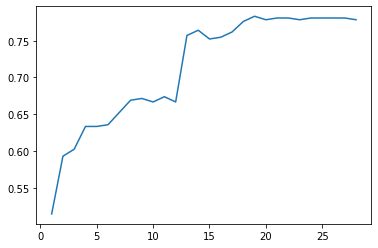

In [137]:
num_of_features = np.linspace(1,28,28)
plt.plot(num_of_features, scores)
plt.show()

In [138]:
feature_scores = pd.DataFrame(scores,columns=['score'])
max(scores), np.argmax(scores)

(0.7833333333333333, 18)

In [139]:
feature_scores

,score
0,0.514286
1,0.592857
2,0.602381
3,0.633333
4,0.633333
5,0.635714
6,0.652381
7,0.669048
8,0.671429
9,0.666667


So, number of features which should be selected is 19

In [140]:
rfe = RFE(lr , n_features_to_select = 19)
rfe.fit(X,y)

RFE(estimator=LogisticRegression(max_iter=1000, random_state=0),
    n_features_to_select=19)

In [141]:
rfe_features = pd.DataFrame (rfe.ranking_, index = X.columns, columns=["selection"]) 
rfe_features

,selection
status,1
duration,1
amount,9
savings,1
employment_duration,3
age,8
credit_history_critical account/other credits elsewhere,6
credit_history_delay in paying off in the past,5
credit_history_existing credits paid back duly till now,2
credit_history_no credits taken/all credits paid back duly,10


In [142]:
features_selected_lr = rfe_features[rfe_features["selection"] == 1].index.copy(deep=True)
features_selected_lr

Index(['status', 'duration', 'savings', 'purpose_car (new) or car (used)',
       'purpose_domestic appliances or radio/television',
       'purpose_furniture/equipment', 'purpose_others',
       'purpose_retraining or repairs', 'personal_status_sex_female : single',
       'personal_status_sex_male : divorced/separated',
       'personal_status_sex_male : married/widowed', 'other_debtors_guarantor',
       'other_debtors_none', 'property_car or other',
       'property_unknown/no property', 'other_installment_plans_none',
       'housing_own', 'housing_rent', 'foreign_worker_yes'],
      dtype='object')

In [143]:
X[features_selected_lr].head()

,status,duration,savings,purpose_car (new) or car (used),purpose_domestic appliances or radio/television,purpose_furniture/equipment,purpose_others,purpose_retraining or repairs,personal_status_sex_female : single,personal_status_sex_male : divorced/separated,personal_status_sex_male : married/widowed,other_debtors_guarantor,other_debtors_none,property_car or other,property_unknown/no property,other_installment_plans_none,housing_own,housing_rent,foreign_worker_yes
0,1,-0.004054,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
1,1,-1.160984,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0
2,2,-0.689848,2,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0
3,1,-0.689848,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1
4,1,-0.689848,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1


In [144]:
X[features_selected_lr].shape

(1400, 19)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X[features_selected_lr], y, test_size=0.3, random_state=42, stratify=y)

In [146]:
lr = LogisticRegression(max_iter=1000,random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [147]:
y_test_predicted = lr.predict(X_test)
y_train_predicted = lr.predict(X_train)

In [148]:
accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)
print('Train Set Accuracy for Power Transformed Data:',round(accuracy_train*100,2),'%')
print('Test Set Accuracy for Power Transformed Data:',round(accuracy_test*100,2),'%')

Train Set Accuracy for Power Transformed Data: 80.1 %
Test Set Accuracy for Power Transformed Data: 78.33 %


In [149]:
kf= KFold(shuffle=True, n_splits=5, random_state=0)
score = cross_val_score(lr, X[features_selected_lr], y, cv=kf, scoring='roc_auc')
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof=1))

Bias Error: 0.13073366478062243
Variance Error: 0.014954259363781076


In [150]:
cm = confusion_matrix(y_test, y_test_predicted)
print(cm)

[[165  45]
 [ 46 164]]


- #### Precision = TruePositives / (TruePositives + FalsePositives)

- #### Recall = TruePositives / (TruePositives + FalseNegatives)

In [151]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       210
           1       0.78      0.78      0.78       210

    accuracy                           0.78       420
   macro avg       0.78      0.78      0.78       420
weighted avg       0.78      0.78      0.78       420



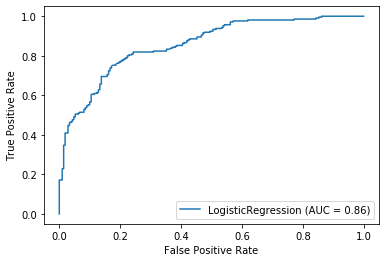

In [152]:
plot_roc_curve(lr, X_test, y_test)

In [153]:
model_smote.append("Logistic Regression")
be_smote.append(1-np.mean(score))
ve_smote.append(np.std(score,ddof=1))
precision0_smote.append(78)
recall0_smote.append(79)
precision1_smote.append(78)
recall1_smote.append(78)
auc_smote.append(86)

### Naive Bayes

In [154]:
from sklearn.naive_bayes import GaussianNB

In [155]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [156]:
nb = GaussianNB()
sfs1 = SFS(nb, k_features=28, scoring='roc_auc' ,cv=kf, verbose=0) 
sfs1 = sfs1.fit(X,y)

In [157]:
sfs_result = pd.DataFrame(sfs1.subsets_).T
sfs_result

,feature_idx,cv_scores,avg_score,feature_names
1,"(0,)","[0.7381025326797386, 0.7308896760613995, 0.765...",0.734697,"(status,)"
2,"(0, 1)","[0.7793096405228759, 0.7660300836798604, 0.808...",0.77776,"(status, duration)"
3,"(0, 1, 17)","[0.7830116421568627, 0.7852559166281636, 0.820...",0.791394,"(status, duration, personal_status_sex_male : ..."
4,"(0, 1, 10, 17)","[0.7892667483660131, 0.7948559987679039, 0.819...",0.799152,"(status, duration, purpose_car (new) or car (u..."
5,"(0, 1, 10, 17, 18)","[0.7770373774509804, 0.8125160429180143, 0.815...",0.805775,"(status, duration, purpose_car (new) or car (u..."
6,"(0, 1, 3, 10, 17, 18)","[0.7964920343137254, 0.819395246162534, 0.8225...",0.812847,"(status, duration, savings, purpose_car (new) ..."
7,"(0, 1, 3, 10, 17, 18, 23)","[0.8066278594771241, 0.8369526156373531, 0.842...",0.817811,"(status, duration, savings, purpose_car (new) ..."
8,"(0, 1, 3, 10, 17, 18, 23, 26)","[0.8123212826797386, 0.8342830740797782, 0.848...",0.824433,"(status, duration, savings, purpose_car (new) ..."
9,"(0, 1, 3, 4, 10, 17, 18, 23, 26)","[0.8134701797385622, 0.8448842343036091, 0.854...",0.82889,"(status, duration, savings, employment_duratio..."
10,"(0, 1, 3, 4, 10, 17, 18, 23, 26, 27)","[0.8234017565359477, 0.8407772472919555, 0.855...",0.832753,"(status, duration, savings, employment_duratio..."


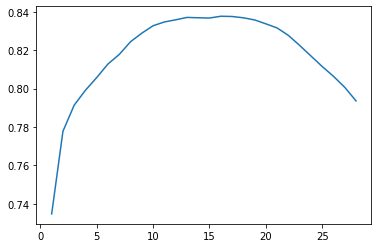

In [158]:
plt.plot(sfs_result['avg_score'])

In [159]:
np.max(sfs_result['avg_score']), np.argmax(sfs_result['avg_score'])

(0.8376921305554618, 15)

So, number of features to be selected = 16

In [160]:
sfs2 = SFS(nb, k_features=16, scoring ='roc_auc' ,cv = kf, verbose=0) 
sfs2 = sfs2.fit(X,y)

In [161]:
features_selected_nb_sfs = sfs2.k_feature_names_
print(features_selected_nb_sfs)

('status', 'duration', 'savings', 'employment_duration', 'age', 'credit_history_no credits taken/all credits paid back duly', 'purpose_car (new) or car (used)', 'purpose_furniture/equipment', 'personal_status_sex_male : married/widowed', 'other_debtors_guarantor', 'other_debtors_none', 'property_car or other', 'property_unknown/no property', 'other_installment_plans_none', 'housing_rent', 'foreign_worker_yes')


In [162]:
mm = MinMaxScaler()
X_scaled = mm.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns = X.columns)
X_scaled.head()

,status,duration,amount,savings,employment_duration,age,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly,...,other_debtors_guarantor,other_debtors_none,property_car or other,property_real estate,property_unknown/no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,foreign_worker_yes
0,0.000000,0.486828,0.364499,0.000000,0.25,0.106825,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.254006,0.595360,0.000000,0.50,0.576194,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.333333,0.348818,0.310485,0.333333,0.75,0.198055,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.000000,0.348818,0.531684,0.000000,0.50,0.632866,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.000000,0.348818,0.536976,0.000000,0.50,0.614798,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[list(features_selected_nb_sfs)], y, test_size=0.3, random_state=42, stratify=y)

In [164]:
nb = GaussianNB()
score = cross_val_score(nb, X_scaled[list(features_selected_nb_sfs)], y, cv=kf, scoring='roc_auc')
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof=1))

Bias Error: 0.16230786944453823
Variance Error: 0.020304421252817274


In [165]:
nb.fit(X_train,y_train)

GaussianNB()

In [166]:
y_train_predicted = nb.predict(X_train)
y_test_predicted = nb.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)

print('Train Set Accuracy for Power Transformed Data:',round(accuracy_train*100,2),'%')
print('Test Set Accuracy for Power Transformed Data:',round(accuracy_test*100,2),'%')

Train Set Accuracy for Power Transformed Data: 74.8 %
Test Set Accuracy for Power Transformed Data: 71.19 %


In [167]:
print(confusion_matrix(y_test, y_test_predicted))

[[116  94]
 [ 27 183]]


In [168]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.81      0.55      0.66       210
           1       0.66      0.87      0.75       210

    accuracy                           0.71       420
   macro avg       0.74      0.71      0.70       420
weighted avg       0.74      0.71      0.70       420



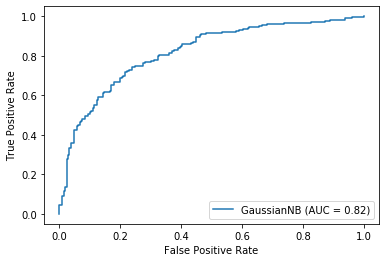

In [169]:
plot_roc_curve(nb, X_test, y_test)

In [170]:
model_smote.append("Naive Bayes")
be_smote.append(1-np.mean(score))
ve_smote.append(np.std(score,ddof=1))
precision0_smote.append(81)
recall0_smote.append(55)
precision1_smote.append(66)
recall1_smote.append(87)
auc_smote.append(82)

###  K-Nearest Neighbors

In [171]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
knn = KNeighborsClassifier()
sfs1 = SFS(knn, k_features=28, scoring='roc_auc' ,cv=kf, verbose=0) 
sfs1 = sfs1.fit(X,y)

In [173]:
sfs_result = pd.DataFrame(sfs1.subsets_).T
sfs_result

,feature_idx,cv_scores,avg_score,feature_names
1,"(1,)","[0.6704452614379085, 0.7160018481441552, 0.710...",0.70503,"(duration,)"
2,"(0, 1)","[0.7534722222222222, 0.7542481646901793, 0.761...",0.751154,"(status, duration)"
3,"(0, 1, 4)","[0.7575571895424837, 0.7845371939011243, 0.814...",0.777016,"(status, duration, employment_duration)"
4,"(0, 1, 3, 4)","[0.7717524509803921, 0.800118075876585, 0.8329...",0.804732,"(status, duration, savings, employment_duration)"
5,"(0, 1, 3, 4, 12)","[0.7975898692810458, 0.818009138046101, 0.8603...",0.820282,"(status, duration, savings, employment_duratio..."
6,"(0, 1, 3, 4, 10, 12)","[0.8019556781045751, 0.8471687458288413, 0.848...",0.830208,"(status, duration, savings, employment_duratio..."
7,"(0, 1, 2, 3, 4, 10, 12)","[0.8313929738562091, 0.8455259510241799, 0.867...",0.840837,"(status, duration, amount, savings, employment..."
8,"(0, 1, 2, 3, 4, 10, 12, 14)","[0.8372906454248366, 0.8621079110837312, 0.886...",0.85691,"(status, duration, amount, savings, employment..."
9,"(0, 1, 2, 3, 4, 10, 12, 14, 19)","[0.8504136029411764, 0.8684224036141485, 0.890...",0.865159,"(status, duration, amount, savings, employment..."
10,"(0, 1, 2, 3, 4, 6, 10, 12, 14, 19)","[0.858047385620915, 0.8744288721186919, 0.8974...",0.869516,"(status, duration, amount, savings, employment..."


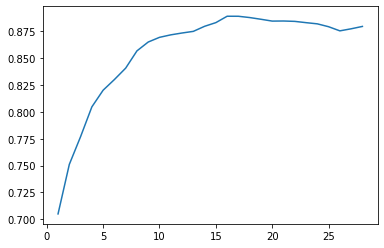

In [174]:
plt.plot(sfs_result['avg_score'])

In [175]:
np.max(sfs_result['avg_score']), np.argmax(sfs_result['avg_score'])

(0.8891722624667127, 15)

So, number of features to be selected = 16

In [176]:
sfs2 = SFS(knn, k_features=16, scoring ='roc_auc' ,cv = kf, verbose=0) 
sfs2 = sfs2.fit(X,y)

In [177]:
features_selected_knn_sfs = sfs2.k_feature_names_
print(features_selected_knn_sfs)

('status', 'duration', 'amount', 'savings', 'employment_duration', 'age', 'credit_history_critical account/other credits elsewhere', 'credit_history_existing credits paid back duly till now', 'purpose_car (new) or car (used)', 'purpose_furniture/equipment', 'purpose_others', 'purpose_retraining or repairs', 'other_debtors_guarantor', 'other_debtors_none', 'property_real estate', 'other_installment_plans_none')


In [178]:
X_scaled = mm.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns = X.columns)
X_scaled.head()

,status,duration,amount,savings,employment_duration,age,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly,...,other_debtors_guarantor,other_debtors_none,property_car or other,property_real estate,property_unknown/no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,foreign_worker_yes
0,0.000000,0.486828,0.364499,0.000000,0.25,0.106825,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.254006,0.595360,0.000000,0.50,0.576194,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.333333,0.348818,0.310485,0.333333,0.75,0.198055,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.000000,0.348818,0.531684,0.000000,0.50,0.632866,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.000000,0.348818,0.536976,0.000000,0.50,0.614798,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[list(features_selected_knn_sfs)], y, test_size=0.3, random_state=0, stratify=y)

In [180]:
knn = KNeighborsClassifier()
param = {'n_neighbors':np.arange(1,100), 'weights':['uniform','distance']}
GS = GridSearchCV(knn, param, cv=kf, scoring='roc_auc')
GS.fit(X_scaled[list(features_selected_knn_sfs)], y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [181]:
GS.best_params_

{'n_neighbors': 11, 'weights': 'distance'}

In [182]:
knn = KNeighborsClassifier(n_neighbors=11, weights='distance')
score = cross_val_score(knn, X_scaled[list(features_selected_knn_sfs)], y, cv=kf, scoring='roc_auc')
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof=1))

Bias Error: 0.12173121365432527
Variance Error: 0.01693842605802792


In [183]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [184]:
y_train_predicted = knn.predict(X_train)
y_test_predicted = knn.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)

print('Train Set Accuracy for Power Transformed Data:',round(accuracy_train*100,2),'%')
print('Test Set Accuracy for Power Transformed Data:',round(accuracy_test*100,2),'%')

Train Set Accuracy for Power Transformed Data: 100.0 %
Test Set Accuracy for Power Transformed Data: 79.29 %


In [185]:
print(confusion_matrix(y_test, y_test_predicted))

[[145  65]
 [ 22 188]]


In [186]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77       210
           1       0.74      0.90      0.81       210

    accuracy                           0.79       420
   macro avg       0.81      0.79      0.79       420
weighted avg       0.81      0.79      0.79       420



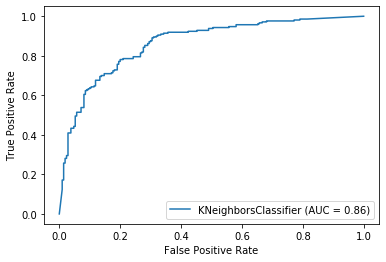

In [187]:
plot_roc_curve(knn, X_test, y_test)

In [188]:
model_smote.append("K-Nearest Neighbors")
be_smote.append(1-np.mean(score))
ve_smote.append(np.std(score,ddof=1))
precision0_smote.append(87)
recall0_smote.append(69)
precision1_smote.append(74)
recall1_smote.append(90)
auc_smote.append(86)

### Decision Tree

In [189]:
from sklearn.tree import DecisionTreeClassifier

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
scores=[]

for n in range(0,28):
    dt = DecisionTreeClassifier(random_state=0)
    rfe = RFE(dt, n_features_to_select = n+1)
    rfe.fit(X_train, y_train)
    
    score = rfe.score(X_test,y_test)
    scores.append(score)

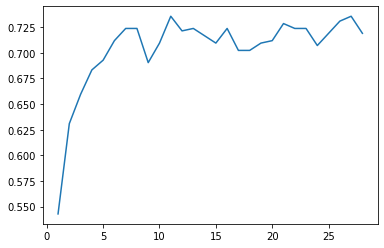

In [191]:
num_of_features = np.linspace(1,28,28)
plt.plot(num_of_features, scores)
plt.show()

In [192]:
feature_scores = pd.DataFrame(scores,columns=['score'])
np.max(scores), np.argmax(scores)

(0.7357142857142858, 10)

In [193]:
feature_scores

,score
0,0.542857
1,0.630952
2,0.659524
3,0.683333
4,0.692857
5,0.711905
6,0.723810
7,0.723810
8,0.690476
9,0.709524


So, number of features which should be selected is 11

In [194]:
rfe = RFE(dt, n_features_to_select = 11)
rfe.fit(X,y)

RFE(estimator=DecisionTreeClassifier(random_state=0), n_features_to_select=11)

In [195]:
rfe_features = pd.DataFrame(rfe.ranking_, index = X.columns, columns=["selection"]) 
rfe_features

,selection
status,1
duration,1
amount,1
savings,1
employment_duration,1
age,1
credit_history_critical account/other credits elsewhere,11
credit_history_delay in paying off in the past,18
credit_history_existing credits paid back duly till now,10
credit_history_no credits taken/all credits paid back duly,1


In [196]:
features_selected_dt = rfe_features[rfe_features["selection"] == 1].index.copy(deep=True)
features_selected_dt

Index(['status', 'duration', 'amount', 'savings', 'employment_duration', 'age',
       'credit_history_no credits taken/all credits paid back duly',
       'purpose_car (new) or car (used)', 'purpose_furniture/equipment',
       'property_unknown/no property', 'other_installment_plans_none'],
      dtype='object')

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X[features_selected_dt], y, test_size=0.3, random_state=42, stratify=y)

In [198]:
param = {'max_depth':np.arange(1,15), 'criterion':['entropy','gini']}
GS = GridSearchCV(dt, param, cv=kf, scoring='roc_auc')
GS.fit(X[features_selected_dt],y)
GS.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [199]:
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy')
score = cross_val_score(dt, X[features_selected_dt], y, cv=kf, scoring='roc_auc')
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof=1))

Bias Error: 0.2116857603825656
Variance Error: 0.03610757521874167


In [200]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [201]:
y_train_predicted = dt.predict(X_train)
y_test_predicted = dt.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)

print('Train Set Accuracy for Power Transformed Data:',round(accuracy_train*100,2),'%')
print('Test Set Accuracy for Power Transformed Data:',round(accuracy_test*100,2),'%')

Train Set Accuracy for Power Transformed Data: 80.2 %
Test Set Accuracy for Power Transformed Data: 72.62 %


In [202]:
print(confusion_matrix(y_test, y_test_predicted))

[[131  79]
 [ 36 174]]


In [203]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.78      0.62      0.69       210
           1       0.69      0.83      0.75       210

    accuracy                           0.73       420
   macro avg       0.74      0.73      0.72       420
weighted avg       0.74      0.73      0.72       420



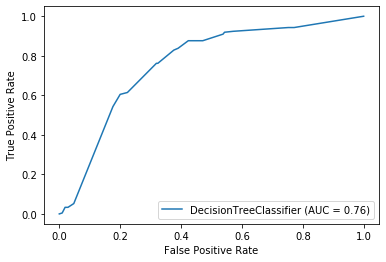

In [204]:
plot_roc_curve(dt, X_test, y_test)

In [205]:
model_smote.append("Decision Tree")
be_smote.append(1-np.mean(score))
ve_smote.append(np.std(score,ddof=1))
precision0_smote.append(78)
recall0_smote.append(62)
precision1_smote.append(69)
recall1_smote.append(83)
auc_smote.append(76)

### Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scores=[]

for n in range(0,28):
    RF = RandomForestClassifier(random_state=0)
    rfe = RFE(RF, n_features_to_select = n+1)
    rfe.fit(X_train, y_train)
    score = rfe.score(X_test,y_test)
    scores.append(score)

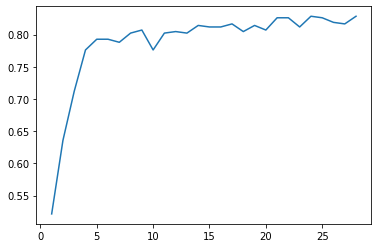

In [208]:
num_of_features = np.linspace(1,28,28)
plt.plot(num_of_features, scores)
plt.show()

In [209]:
feature_scores = pd.DataFrame(scores,columns=['score'])
np.max(scores), np.argmax(scores)

(0.8285714285714286, 23)

In [210]:
feature_scores

,score
0,0.521429
1,0.635714
2,0.711905
3,0.776190
4,0.792857
5,0.792857
6,0.788095
7,0.802381
8,0.807143
9,0.776190


So, number of features which should be selected is 24

In [211]:
rfe = RFE(RF, n_features_to_select = 24)
rfe.fit(X,y)

RFE(estimator=RandomForestClassifier(random_state=0), n_features_to_select=24)

In [212]:
rfe_features = pd.DataFrame(rfe.ranking_, index = X.columns, columns=["selection"]) 
rfe_features

,selection
status,1
duration,1
amount,1
savings,1
employment_duration,1
age,1
credit_history_critical account/other credits elsewhere,1
credit_history_delay in paying off in the past,1
credit_history_existing credits paid back duly till now,1
credit_history_no credits taken/all credits paid back duly,1


In [213]:
features_selected_rf = rfe_features[rfe_features["selection"] == 1].index.copy(deep=True)
features_selected_rf

Index(['status', 'duration', 'amount', 'savings', 'employment_duration', 'age',
       'credit_history_critical account/other credits elsewhere',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/all credits paid back duly',
       'purpose_car (new) or car (used)', 'purpose_furniture/equipment',
       'purpose_others', 'purpose_retraining or repairs',
       'personal_status_sex_female : single',
       'personal_status_sex_male : married/widowed', 'other_debtors_guarantor',
       'other_debtors_none', 'property_car or other', 'property_real estate',
       'property_unknown/no property', 'other_installment_plans_none',
       'housing_own', 'housing_rent'],
      dtype='object')

In [214]:
X[features_selected_rf]

,status,duration,amount,savings,employment_duration,age,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly,...,personal_status_sex_female : single,personal_status_sex_male : married/widowed,other_debtors_guarantor,other_debtors_none,property_car or other,property_real estate,property_unknown/no property,other_installment_plans_none,housing_own,housing_rent
0,1,-0.004054,-1.079443,1,2,-1.824686,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
1,1,-1.160984,0.215350,1,3,0.295513,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
2,2,-0.689848,-1.382388,2,4,-1.412590,0,0,0,1,...,0,0,0,1,0,0,1,1,0,0
3,1,-0.689848,-0.141779,1,3,0.551504,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
4,1,-0.689848,-0.112096,1,3,0.469891,0,0,0,0,...,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1,-0.004054,-0.053808,1,3,-1.098965,0,0,0,1,...,0,0,0,1,0,0,1,1,0,1
1396,1,-0.004054,-0.557952,1,3,-0.949589,0,0,0,1,...,0,0,0,1,0,0,1,1,0,1
1397,4,1.222452,0.811138,1,2,-0.892984,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1398,1,-0.150625,-0.942907,1,1,0.083502,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [215]:
X_train, X_test, y_train, y_test = train_test_split(X[features_selected_rf], y, test_size=0.3, random_state=42, stratify=y)

In [216]:
RF_be = []
RF_ve = []

for n in np.arange(1,100):
    RF = RandomForestClassifier(n_estimators=n,criterion='entropy',random_state=0)
    score = cross_val_score(RF, X[features_selected_rf], y, cv=kf, scoring='roc_auc')
    RF_be.append(np.mean(1-score))
    RF_ve.append(np.std(score,ddof=1))

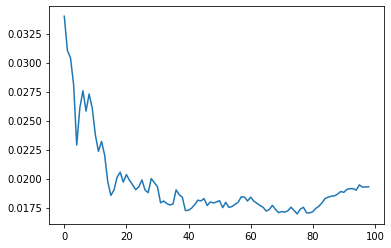

In [217]:
plt.plot(np.arange(len(RF_ve)), RF_ve)

In [218]:
np.min(RF_ve), np.argmin(RF_ve)

(0.01695282480680394, 75)

In [219]:
RF_be = []
RF_ve = []

for n in np.arange(1,100):
    RF = RandomForestClassifier(n_estimators=n,criterion='gini',random_state=0)
    score = cross_val_score(RF, X[features_selected_rf], y, cv=kf, scoring='roc_auc')
    RF_be.append(np.mean(1-score))
    RF_ve.append(np.std(score,ddof=1))

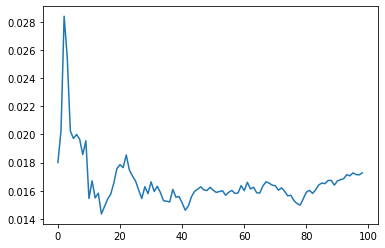

In [220]:
plt.plot(np.arange(len(RF_ve)), RF_ve)

In [221]:
np.min(RF_ve), np.argmin(RF_ve)

(0.014349180107674175, 14)

In [222]:
RF = RandomForestClassifier(n_estimators=15,criterion='gini')
score = cross_val_score(RF, X[features_selected_rf], y, cv=kf, scoring='roc_auc')
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof=1))

Bias Error: 0.10992714465353348
Variance Error: 0.027486820573998972


In [223]:
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15)

In [224]:
y_train_predicted = RF.predict(X_train)
y_test_predicted = RF.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)

print('Train Set Accuracy for Power Transformed Data:',round(accuracy_train*100,2),'%')
print('Test Set Accuracy for Power Transformed Data:',round(accuracy_test*100,2),'%')

Train Set Accuracy for Power Transformed Data: 99.69 %
Test Set Accuracy for Power Transformed Data: 79.76 %


In [225]:
print(confusion_matrix(y_test, y_test_predicted))

[[167  43]
 [ 42 168]]


In [226]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       210
           1       0.80      0.80      0.80       210

    accuracy                           0.80       420
   macro avg       0.80      0.80      0.80       420
weighted avg       0.80      0.80      0.80       420



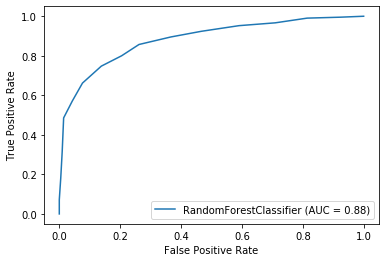

In [227]:
plot_roc_curve(RF, X_test, y_test)

In [228]:
model_smote.append("Random Forest")
be_smote.append(1-np.mean(score))
ve_smote.append(np.std(score,ddof=1))
precision0_smote.append(80)
recall0_smote.append(80)
precision1_smote.append(80)
recall1_smote.append(80)
auc_smote.append(88)

### Bagged Logistic Regression

In [229]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X[features_selected_lr], y, test_size=0.3, random_state=42, stratify=y)

In [231]:
LR_bagged_be = []
LR_bagged_ve = []

for n in np.arange(1,100):
    LR_bag = BaggingClassifier(base_estimator=lr, n_estimators=n, random_state=0)
    score = cross_val_score(LR_bag, X[features_selected_lr], y, cv=kf, scoring='roc_auc')
    LR_bagged_be.append(np.mean(1-score))
    LR_bagged_ve.append(np.std(score,ddof=1))

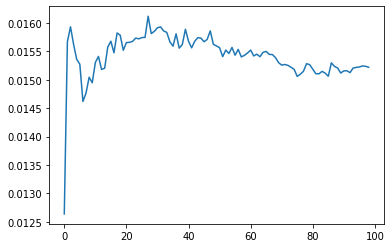

In [232]:
plt.plot(np.arange(len(LR_bagged_ve)), LR_bagged_ve)

In [233]:
np.min(LR_bagged_ve), np.argmin(LR_bagged_ve)

(0.012639704499885645, 0)

In [234]:
lr_bag = BaggingClassifier(base_estimator = lr, n_estimators=1, random_state=0)
score = cross_val_score(lr_bag, X[features_selected_lr], y, cv=kf, scoring='roc_auc')
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof=1))

Bias Error: 0.13765230341767476
Variance Error: 0.012639704499885645


In [235]:
lr_bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=0),
                  n_estimators=1, random_state=0)

In [236]:
y_train_predicted = lr_bag.predict(X_train)
y_test_predicted = lr_bag.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)
print('Train Set Accuracy for Power Transformed Data:',round(accuracy_train*100,2),'%')
print('Test Set Accuracy for Power Transformed Data:',round(accuracy_test*100,2),'%')

Train Set Accuracy for Power Transformed Data: 81.02 %
Test Set Accuracy for Power Transformed Data: 77.14 %


In [237]:
print(confusion_matrix(y_test, y_test_predicted))

[[164  46]
 [ 50 160]]


In [238]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       210
           1       0.78      0.76      0.77       210

    accuracy                           0.77       420
   macro avg       0.77      0.77      0.77       420
weighted avg       0.77      0.77      0.77       420



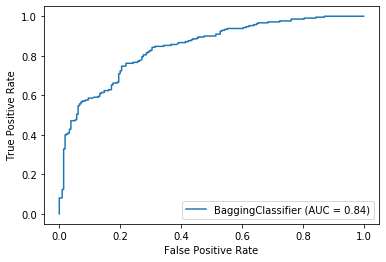

In [239]:
plot_roc_curve(lr_bag, X_test, y_test)

In [240]:
model_smote.append("Bagged Logistic Regression")
be_smote.append(1-np.mean(score))
ve_smote.append(np.std(score,ddof=1))
precision0_smote.append(77)
recall0_smote.append(78)
precision1_smote.append(78)
recall1_smote.append(76)
auc_smote.append(84)

### Bagged Naive Bayes

In [241]:
NB_bagged_be = []
NB_bagged_ve = []
nb = GaussianNB()

for n in np.arange(1,100):
    NB_bag = BaggingClassifier(base_estimator=nb, n_estimators=n, random_state=0)
    score = cross_val_score(NB_bag, X_scaled[list(features_selected_nb_sfs)], y, cv=kf,scoring='roc_auc')
    NB_bagged_be.append(np.mean(1-score))
    NB_bagged_ve.append(np.std(score,ddof = 1))

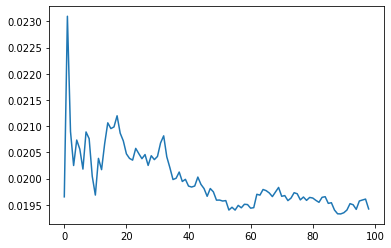

In [242]:
plt.plot(np.arange(len(NB_bagged_be)),NB_bagged_ve)

In [243]:
min(NB_bagged_ve),np.argmin(NB_bagged_ve)

(0.019327211121312363, 89)

In [244]:
NB_bag = BaggingClassifier(base_estimator=nb, n_estimators = 90, random_state=0)
score = cross_val_score(NB_bag, X_scaled[list(features_selected_nb_sfs)], y, cv=kf, scoring='roc_auc')
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof =1))

Bias Error: 0.16242313062202185
Variance Error: 0.019327211121312363


In [245]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[list(features_selected_nb_sfs)], y, test_size=0.3, random_state=42, stratify=y)

In [246]:
NB_bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=GaussianNB(), n_estimators=90, random_state=0)

In [247]:
y_train_predicted = NB_bag.predict(X_train)
y_test_predicted = NB_bag.predict(X_test)

In [248]:
accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)
print('Train Set Accuracy for Power Transformed Data:',round(accuracy_train*100,2),'%')
print('Test Set Accuracy for Power Transformed Data:',round(accuracy_test*100,2),'%')

Train Set Accuracy for Power Transformed Data: 74.8 %
Test Set Accuracy for Power Transformed Data: 71.9 %


In [249]:
print(confusion_matrix(y_test, y_test_predicted))

[[116  94]
 [ 24 186]]


In [250]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.83      0.55      0.66       210
           1       0.66      0.89      0.76       210

    accuracy                           0.72       420
   macro avg       0.75      0.72      0.71       420
weighted avg       0.75      0.72      0.71       420



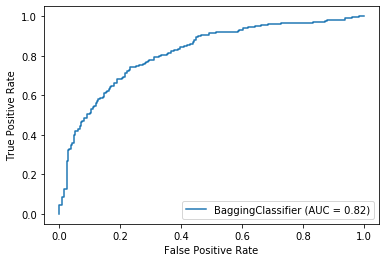

In [251]:
plot_roc_curve(NB_bag, X_test, y_test)

In [252]:
model_smote.append("Bagged Naive Bayes")
be_smote.append(1-np.mean(score))
ve_smote.append(np.std(score,ddof=1))
precision0_smote.append(83)
recall0_smote.append(55)
precision1_smote.append(66)
recall1_smote.append(89)
auc_smote.append(82)

### Bagged KNN

In [253]:
KNN_bagged_be = []
KNN_bagged_ve = []
knn= KNeighborsClassifier(n_neighbors=11,weights="distance")

for n in np.arange(1,100):
    KNN_bag = BaggingClassifier(base_estimator=knn, n_estimators = n, random_state = 0)
    score = cross_val_score(KNN_bag, X_scaled[list(features_selected_knn_sfs)], y, cv=kf, scoring="roc_auc")
    KNN_bagged_be.append(np.mean(1-score))
    KNN_bagged_ve.append(np.std(score,ddof = 1))

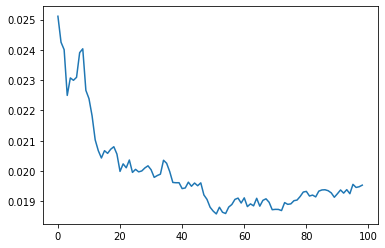

In [254]:
plt.plot(np.arange(len(KNN_bagged_ve)),KNN_bagged_ve)

In [255]:
np.min(KNN_bagged_ve),np.argmin(KNN_bagged_ve)

(0.018581620404687534, 51)

In [256]:
KNN_bag = BaggingClassifier(base_estimator=knn, n_estimators=52, random_state = 0)
score = cross_val_score(KNN_bag, X_scaled[list(features_selected_knn_sfs)], y, cv=kf, scoring='roc_auc')
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof =1))

Bias Error: 0.124754108589614
Variance Error: 0.018581620404687534


In [257]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[list(features_selected_knn_sfs)], y, test_size=0.3, random_state=42, stratify=y)

In [258]:
KNN_bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=11,
                                                      weights='distance'),
                  n_estimators=52, random_state=0)

In [259]:
y_train_predicted = KNN_bag.predict(X_train)
y_test_predicted = KNN_bag.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)

print('Train Set Accuracy for Power Transformed Data:',round(accuracy_train*100,2),'%')
print('Test Set Accuracy for Power Transformed Data:',round(accuracy_test*100,2),'%')

Train Set Accuracy for Power Transformed Data: 100.0 %
Test Set Accuracy for Power Transformed Data: 80.71 %


In [260]:
print(confusion_matrix(y_test, y_test_predicted))

[[163  47]
 [ 34 176]]


In [261]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       210
           1       0.79      0.84      0.81       210

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.81      0.81      0.81       420



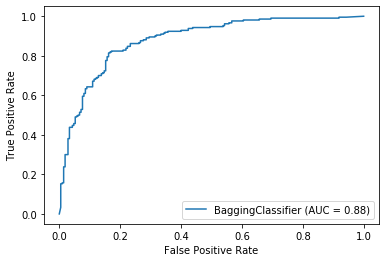

In [262]:
plot_roc_curve(KNN_bag, X_test, y_test)

In [263]:
model_smote.append("Bagged KNN")
be_smote.append(1-np.mean(score))
ve_smote.append(np.std(score,ddof=1))
precision0_smote.append(83)
recall0_smote.append(78)
precision1_smote.append(79)
recall1_smote.append(84)
auc_smote.append(88)

### Boosted Logstic Regression

In [264]:
AB_LR_be = []
AB_LR_ve = []

for n in np.arange(1,300):
    AB_LR = AdaBoostClassifier(base_estimator = lr ,n_estimators = n, random_state=0)
    score = cross_val_score(AB_LR, X[features_selected_lr], y, cv=kf, scoring="roc_auc")
    AB_LR_be.append(np.mean(1-score))
    AB_LR_ve.append(np.std(score,ddof = 1))

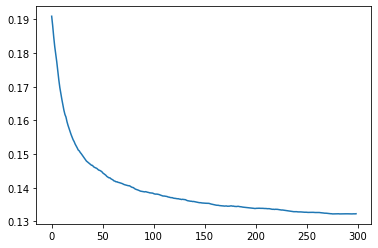

In [265]:
plt.plot(np.arange(len(AB_LR_be)),AB_LR_be)

In [266]:
np.min(AB_LR_be),np.argmin(AB_LR_be), AB_LR_ve[np.argmin(AB_LR_be)]

(0.13219772720333886, 275, 0.015526852251885622)

In [267]:
AB_LR = AdaBoostClassifier(base_estimator = lr, n_estimators =276, random_state=0)
score = cross_val_score(AB_LR, X[features_selected_lr], y, cv=kf, scoring = "roc_auc")
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof =1))

Bias Error: 0.13219772720333878
Variance Error: 0.015526852251885622


In [268]:
X_train, X_test, y_train, y_test = train_test_split(X[features_selected_lr], y, test_size=0.3, random_state=42, stratify=y)

In [269]:
AB_LR.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                     random_state=0),
                   n_estimators=276, random_state=0)

In [270]:
y_train_predicted = AB_LR.predict(X_train)
y_test_predicted = AB_LR.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)
print('Train Set Accuracy for Power Transformed Data:',round(accuracy_train*100,2),'%')
print('Test Set Accuracy for Power Transformed Data:',round(accuracy_test*100,2),'%')

Train Set Accuracy for Power Transformed Data: 80.51 %
Test Set Accuracy for Power Transformed Data: 77.14 %


In [271]:
print(confusion_matrix(y_test, y_test_predicted))

[[159  51]
 [ 45 165]]


In [272]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       210
           1       0.76      0.79      0.77       210

    accuracy                           0.77       420
   macro avg       0.77      0.77      0.77       420
weighted avg       0.77      0.77      0.77       420



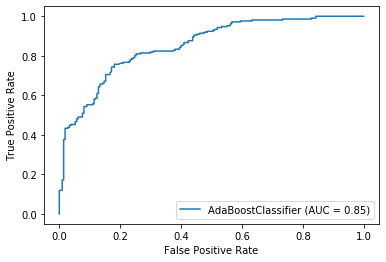

In [273]:
plot_roc_curve(AB_LR, X_test, y_test)

In [274]:
model_smote.append("Boosted Logistic Regression")
be_smote.append(1-np.mean(score))
ve_smote.append(np.std(score,ddof=1))
precision0_smote.append(78)
recall0_smote.append(76)
precision1_smote.append(76)
recall1_smote.append(79)
auc_smote.append(85)

### Boosted Naive Bayes

In [275]:
AB_NB_be = []
AB_NB_ve = []

for n in np.arange(1,100):
    AB_NB = AdaBoostClassifier(base_estimator = nb, n_estimators = n,random_state=0)
    score = cross_val_score(AB_NB, X_scaled[list(features_selected_nb_sfs)],y,cv=kf,scoring="roc_auc")
    AB_NB_be.append(np.mean(1-score))
    AB_NB_ve.append(np.std(score,ddof = 1))

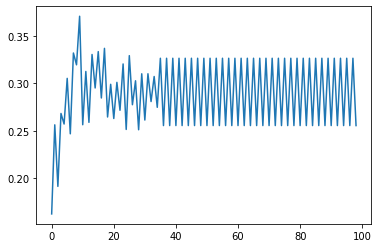

In [276]:
plt.plot(np.arange(len(AB_NB_be)),AB_NB_be)

In [277]:
np.min(AB_NB_be),np.argmin(AB_NB_be),AB_NB_ve[np.argmin(AB_NB_be)]

(0.1622974711856435, 0, 0.020328319219221288)

In [278]:
AB_NB = AdaBoostClassifier(base_estimator = nb,n_estimators = 1,random_state=0)
score = cross_val_score(AB_NB, X_scaled[list(features_selected_nb_sfs)], y, cv=kf, scoring='roc_auc')
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof =1))

Bias Error: 0.16229747118564342
Variance Error: 0.020328319219221288


In [279]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[list(features_selected_nb_sfs)], y, test_size=0.3, random_state=42, stratify=y)

In [280]:
AB_NB.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=1, random_state=0)

In [281]:
y_train_predicted = AB_NB.predict(X_train)
y_test_predicted = AB_NB.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)

print('Train Set Accuracy for Power Transformed Data:',round(accuracy_train*100,2),'%')
print('Test Set Accuracy for Power Transformed Data:',round(accuracy_test*100,2),'%')

Train Set Accuracy for Power Transformed Data: 74.8 %
Test Set Accuracy for Power Transformed Data: 71.19 %


In [282]:
print(confusion_matrix(y_test, y_test_predicted))

[[116  94]
 [ 27 183]]


In [283]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.81      0.55      0.66       210
           1       0.66      0.87      0.75       210

    accuracy                           0.71       420
   macro avg       0.74      0.71      0.70       420
weighted avg       0.74      0.71      0.70       420



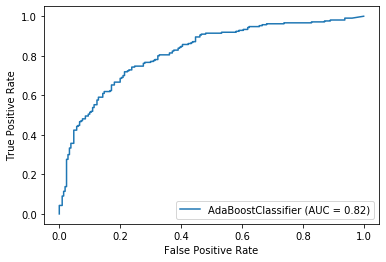

In [284]:
plot_roc_curve(AB_NB, X_test, y_test)

In [285]:
model_smote.append("Boosted Naive Bayes")
be_smote.append(1-np.mean(score))
ve_smote.append(np.std(score,ddof=1))
precision0_smote.append(81)
recall0_smote.append(55)
precision1_smote.append(66)
recall1_smote.append(87)
auc_smote.append(82)

### Boosted Random Forest

In [286]:
AB_RF_be = []
AB_RF_ve = []

RF = RandomForestClassifier(n_estimators=15,criterion='gini')

for n in np.arange(1,100):
    AB_RF = AdaBoostClassifier(base_estimator=RF, n_estimators = n, random_state=0)
    score = cross_val_score(AB_RF, X[features_selected_rf], y, cv=kf, scoring="roc_auc")
    AB_RF_be.append(np.mean(1-score))
    AB_RF_ve.append(np.std(score,ddof = 1))

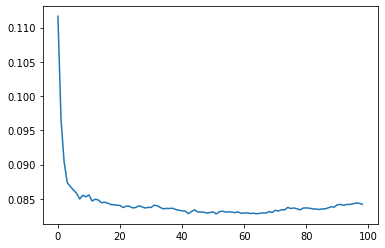

In [287]:
plt.plot(np.arange(len(AB_RF_be)),AB_RF_be)

In [288]:
np.min(AB_RF_be),np.argmin(AB_RF_be),AB_RF_ve[np.argmin(AB_RF_be)]

(0.0827952290603599, 51, 0.022531212875086453)

In [289]:
AB_RF = AdaBoostClassifier(base_estimator = RF,n_estimators = 52,random_state=0)
score = cross_val_score(AB_RF,X[features_selected_rf],y,cv=kf,scoring = "roc_auc")
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof =1))

Bias Error: 0.08279522906035974
Variance Error: 0.022531212875086453


In [290]:
X_train, X_test, y_train, y_test = train_test_split(X[features_selected_rf], y, test_size=0.3, random_state=42, stratify=y)

In [291]:
AB_RF.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=15),
                   n_estimators=52, random_state=0)

In [292]:
y_train_predicted = AB_RF.predict(X_train)
y_test_predicted = AB_RF.predict(X_test)

In [293]:
accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)
print('Train Set Accuracy for Power Transformed Data:',round(accuracy_train*100,2),'%')
print('Test Set Accuracy for Power Transformed Data:',round(accuracy_test*100,2),'%')

Train Set Accuracy for Power Transformed Data: 100.0 %
Test Set Accuracy for Power Transformed Data: 81.9 %


In [294]:
print(confusion_matrix(y_test, y_test_predicted))

[[170  40]
 [ 36 174]]


In [295]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       210
           1       0.81      0.83      0.82       210

    accuracy                           0.82       420
   macro avg       0.82      0.82      0.82       420
weighted avg       0.82      0.82      0.82       420



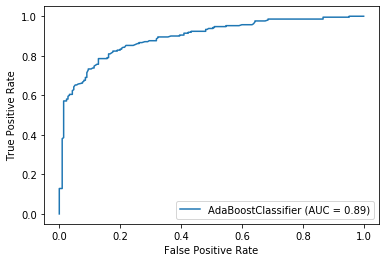

In [296]:
plot_roc_curve(AB_RF, X_test, y_test)

In [297]:
model_smote.append("Boosted Random Forest")
be_smote.append(1-np.mean(score))
ve_smote.append(np.std(score,ddof=1))
precision0_smote.append(83)
recall0_smote.append(81)
precision1_smote.append(81)
recall1_smote.append(83)
auc_smote.append(89)

### Gradient Boosting

In [298]:
from sklearn.ensemble import GradientBoostingClassifier

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scores=[]

for n in range(0,28):
    GB = GradientBoostingClassifier(random_state=0)
    rfe = RFE(GB, n_features_to_select = n+1)
    rfe.fit(X_train, y_train)
    score = rfe.score(X_test,y_test)
    scores.append(score)

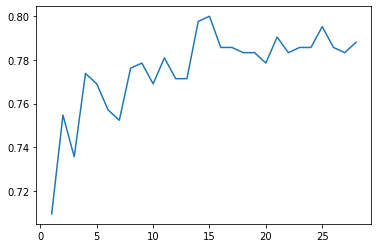

In [300]:
num_of_features = np.linspace(1,28,28)
plt.plot(num_of_features, scores)
plt.show()

In [301]:
feature_scores = pd.DataFrame(scores,columns=['score'])
np.max(scores), np.argmax(scores)

(0.8, 14)

In [302]:
feature_scores

,score
0,0.709524
1,0.754762
2,0.735714
3,0.773810
4,0.769048
5,0.757143
6,0.752381
7,0.776190
8,0.778571
9,0.769048


So, number of features which should be selected is 15

In [303]:
rfe = RFE(GB, n_features_to_select = 15)
rfe.fit(X,y)

RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=15)

In [304]:
rfe_features = pd.DataFrame(rfe.ranking_, index = X.columns, columns=["selection"]) 
rfe_features

,selection
status,1
duration,1
amount,1
savings,1
employment_duration,1
age,1
credit_history_critical account/other credits elsewhere,7
credit_history_delay in paying off in the past,9
credit_history_existing credits paid back duly till now,5
credit_history_no credits taken/all credits paid back duly,13


In [305]:
features_selected_gb = rfe_features[rfe_features["selection"] == 1].index.copy(deep=True)
features_selected_gb

Index(['status', 'duration', 'amount', 'savings', 'employment_duration', 'age',
       'purpose_car (new) or car (used)', 'purpose_furniture/equipment',
       'personal_status_sex_male : married/widowed', 'other_debtors_guarantor',
       'property_car or other', 'property_unknown/no property',
       'other_installment_plans_none', 'housing_own', 'housing_rent'],
      dtype='object')

In [306]:
X[features_selected_gb].head()

,status,duration,amount,savings,employment_duration,age,purpose_car (new) or car (used),purpose_furniture/equipment,personal_status_sex_male : married/widowed,other_debtors_guarantor,property_car or other,property_unknown/no property,other_installment_plans_none,housing_own,housing_rent
0,1,-0.004054,-1.079443,1,2,-1.824686,1,0,0,0,1,0,1,0,0
1,1,-1.160984,0.215350,1,3,0.295513,0,0,1,0,0,1,1,0,0
2,2,-0.689848,-1.382388,2,4,-1.412590,0,0,0,0,0,1,1,0,0
3,1,-0.689848,-0.141779,1,3,0.551504,0,0,1,0,0,1,1,0,0
4,1,-0.689848,-0.112096,1,3,0.469891,0,0,1,0,1,0,0,0,1


In [307]:
X_train, X_test, y_train, y_test = train_test_split(X[features_selected_gb], y, test_size=0.3, random_state=42, stratify=y)

In [308]:
GB = GradientBoostingClassifier(random_state=0)
param = {'n_estimators':np.arange(1,100)}
GS = GridSearchCV(GB, param, cv=kf, scoring='roc_auc')
GS.fit(X[features_selected_gb], y)
GS.best_params_

{'n_estimators': 96}

In [309]:
GBoost = GradientBoostingClassifier(n_estimators=96,random_state=0)
score = cross_val_score(GBoost, X[features_selected_gb], y, cv=kf, scoring = "roc_auc")
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof =1))

Bias Error: 0.11895328933680549
Variance Error: 0.01696730696196629


In [310]:
GBoost.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=96, random_state=0)

In [311]:
y_train_predicted = GBoost.predict(X_train)
y_test_predicted = GBoost.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)

print('Train Set Accuracy for Power Transformed Data:',round(accuracy_train*100,2),'%')
print('Test Set Accuracy for Power Transformed Data:',round(accuracy_test*100,2),'%')

Train Set Accuracy for Power Transformed Data: 88.98 %
Test Set Accuracy for Power Transformed Data: 78.57 %


In [312]:
print(confusion_matrix(y_test, y_test_predicted))

[[161  49]
 [ 41 169]]


In [313]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       210
           1       0.78      0.80      0.79       210

    accuracy                           0.79       420
   macro avg       0.79      0.79      0.79       420
weighted avg       0.79      0.79      0.79       420



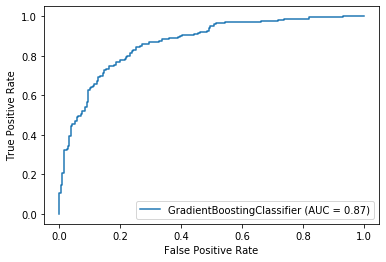

In [314]:
plot_roc_curve(GBoost, X_test, y_test)

In [315]:
model_smote.append("Gradient Boosting")
be_smote.append(1-np.mean(score))
ve_smote.append(np.std(score,ddof=1))
precision0_smote.append(80)
recall0_smote.append(77)
precision1_smote.append(78)
recall1_smote.append(80)
auc_smote.append(87)

### Stacked Models

In [322]:
from sklearn.ensemble import VotingClassifier

#### Stacked GB + Boosted RF

In [351]:
AB_RF = AdaBoostClassifier(base_estimator=RF,n_estimators=15, random_state=0)
GBoost = GradientBoostingClassifier(n_estimators=96,random_state=0)

In [352]:
stacked_gb_boosted_rf = VotingClassifier(estimators = [('Boosted RF',AB_RF),('GBoost',GBoost)],voting='soft')
score = cross_val_score(stacked_gb_boosted_rf, X, y, cv=kf, scoring='roc_auc')
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof =1))

Bias Error: 0.0971579183243858
Variance Error: 0.023665280047461636


In [353]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [354]:
stacked_gb_boosted_rf.fit(X_train, y_train)

VotingClassifier(estimators=[('Boosted RF',
                              AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=15),
                                                 n_estimators=15,
                                                 random_state=0)),
                             ('GBoost',
                              GradientBoostingClassifier(n_estimators=96,
                                                         random_state=0))],
                 voting='soft')

In [358]:
y_train_predicted = stacked_gb_boosted_rf.predict(X_train)
y_test_predicted = stacked_gb_boosted_rf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)

print('Train Set Accuracy for Power Transformed Data:',round(accuracy_train*100,2),'%')
print('Test Set Accuracy for Power Transformed Data:',round(accuracy_test*100,2),'%')

Train Set Accuracy for Power Transformed Data: 98.47 %
Test Set Accuracy for Power Transformed Data: 80.0 %


In [359]:
print(confusion_matrix(y_test, y_test_predicted))

[[165  45]
 [ 39 171]]


In [360]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       210
           1       0.79      0.81      0.80       210

    accuracy                           0.80       420
   macro avg       0.80      0.80      0.80       420
weighted avg       0.80      0.80      0.80       420



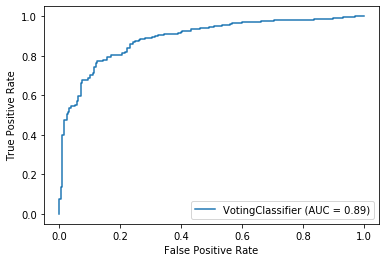

In [361]:
plot_roc_curve(stacked_gb_boosted_rf, X_test, y_test)

In [363]:
model_smote.append("Stacked GB + Boosted RF")
be_smote.append(1-np.mean(score))
ve_smote.append(np.std(score,ddof=1))
precision0_smote.append(81)
recall0_smote.append(79)
precision1_smote.append(79)
recall1_smote.append(81)
auc_smote.append(89)

In [428]:
pd.DataFrame({"Bias error":be_smote,"Variance Error":ve_smote,'AUC':[x/100 for x in auc_smote],
              'Precision : Good Risk':[x/100 for x in precision0_smote],'Recall : Good Risk':[x/100 for x in recall0_smote],
              'Precision : Bad Risk':[x/100 for x in precision1_smote],'Recall : Bad Risk':[x/100 for x in recall1_smote]}
             ,index = model_smote)

,Bias error,Variance Error,AUC,Precision : Good Risk,Recall : Good Risk,Precision : Bad Risk,Recall : Bad Risk
Logistic Regression,0.130734,0.014954,0.86,0.78,0.79,0.78,0.78
Naive Bayes,0.162308,0.020304,0.82,0.81,0.55,0.66,0.87
K-Nearest Neighbors,0.121731,0.016938,0.86,0.87,0.69,0.74,0.90
Decision Tree,0.211686,0.036108,0.76,0.78,0.62,0.69,0.83
Random Forest,0.109927,0.027487,0.88,0.80,0.80,0.80,0.80
Bagged Logistic Regression,0.137652,0.012640,0.84,0.77,0.78,0.78,0.76
Bagged Naive Bayes,0.162423,0.019327,0.82,0.83,0.55,0.66,0.89
Bagged KNN,0.124754,0.018582,0.88,0.83,0.78,0.79,0.84
Boosted Logistic Regression,0.132198,0.015527,0.85,0.78,0.76,0.76,0.79
Boosted Naive Bayes,0.162297,0.020328,0.82,0.81,0.55,0.66,0.87


### Adjusting Threshold

In [365]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score, roc_curve, auc

#### Random Forest

In [366]:
X_train, X_test, y_train, y_test = train_test_split(X[features_selected_rf], y, test_size=0.3, random_state=42, stratify=y)

In [367]:
RF = RandomForestClassifier(n_estimators=15,criterion='gini')
AB_RF = AdaBoostClassifier(base_estimator = RF, n_estimators = 52,random_state=0)
score = cross_val_score(AB_RF, X[features_selected_rf], y, cv=kf, scoring='roc_auc')
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof =1))

Bias Error: 0.08279522906035974
Variance Error: 0.022531212875086453


In [368]:
AB_RF.fit(X_train,y_train)

y_train_predicted = AB_RF.predict(X_train)
y_test_predicted = AB_RF.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)

print('Train Set Accuracy for Power Transformed Data:',round(accuracy_train*100,2),'%')
print('Test Set Accuracy for Power Transformed Data:',round(accuracy_test*100,2),'%')

Train Set Accuracy for Power Transformed Data: 100.0 %
Test Set Accuracy for Power Transformed Data: 81.9 %


In [369]:
print(confusion_matrix(y_test, y_test_predicted))

[[170  40]
 [ 36 174]]


In [370]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       210
           1       0.81      0.83      0.82       210

    accuracy                           0.82       420
   macro avg       0.82      0.82      0.82       420
weighted avg       0.82      0.82      0.82       420



In [371]:
y_pred_prob = AB_RF.predict_proba(X_test)[:,1]

In [372]:
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)

In [373]:
len(thresholds)

177

In [374]:
auc(fpr,tpr)

0.8935714285714286

In [375]:
recall=[]
precision=[]

for i in thresholds:
    pred1 = np.where(y_pred_prob > i, 1, 0)
    recall.append(recall_score(y_test,pred1))
    precision.append(precision_score(y_test,pred1))

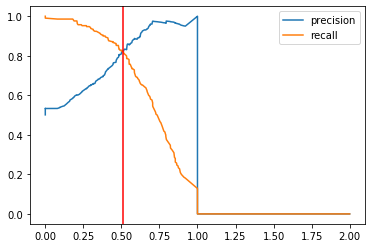

In [376]:
plt.plot(thresholds,precision)
plt.plot(thresholds,recall)
plt.legend(['precision','recall'])
plt.axvline(x=0.51,color='r')

In [377]:
recall=[]
precision=[]
li=np.arange(0.51,1,0.0001)

for i in li:
    pred1=np.where(y_pred_prob < i, 0, 1)
    recall.append(recall_score(y_test,pred1))
    precision.append(precision_score(y_test,pred1))

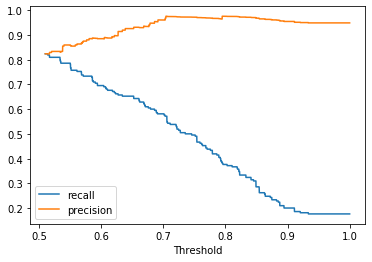

In [378]:
plt.plot(li,recall)
plt.plot(li,precision)
plt.xlabel('Threshold')
plt.legend(['recall','precision'])

In [379]:
print(classification_report(y_test,np.where(AB_RF.predict_proba(X_test)[:,1] < 0.51,0,1)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       210
           1       0.82      0.82      0.82       210

    accuracy                           0.82       420
   macro avg       0.82      0.82      0.82       420
weighted avg       0.82      0.82      0.82       420



#### Bagged KNN

In [397]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[list(features_selected_knn_sfs)], y, test_size=0.3, random_state=42, stratify=y)

In [398]:
KNN_bag = BaggingClassifier(base_estimator=knn, n_estimators=52, random_state = 0)
score = cross_val_score(KNN_bag, X_scaled[list(features_selected_knn_sfs)], y, cv=kf, scoring='roc_auc')
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof=1))

Bias Error: 0.124754108589614
Variance Error: 0.018581620404687534


In [399]:
KNN_bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=11,
                                                      weights='distance'),
                  n_estimators=52, random_state=0)

In [400]:
y_train_predicted = KNN_bag.predict(X_train)
y_test_predicted = KNN_bag.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)

print('Train Set Accuracy for Power Transformed Data:',round(accuracy_train*100,2),'%')
print('Test Set Accuracy for Power Transformed Data:',round(accuracy_test*100,2),'%')

Train Set Accuracy for Power Transformed Data: 100.0 %
Test Set Accuracy for Power Transformed Data: 80.71 %


In [401]:
print(confusion_matrix(y_test, y_test_predicted))

[[163  47]
 [ 34 176]]


In [402]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       210
           1       0.79      0.84      0.81       210

    accuracy                           0.81       420
   macro avg       0.81      0.81      0.81       420
weighted avg       0.81      0.81      0.81       420



In [403]:
y_pred_prob = KNN_bag.predict_proba(X_test)[:,1]

In [404]:
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)

In [405]:
len(thresholds)

117

In [406]:
auc(fpr,tpr)

0.8809410430839003

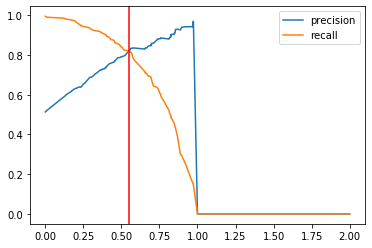

In [407]:
recall=[]
precision=[]


for i in thresholds:
    pred1 = np.where(y_pred_prob > i, 1, 0)
    recall.append(recall_score(y_test,pred1))
    precision.append(precision_score(y_test,pred1))

plt.plot(thresholds,precision)
plt.plot(thresholds,recall)
plt.legend(['precision','recall'])
plt.axvline(x=0.55,color='r')

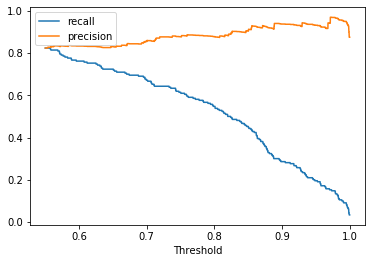

In [408]:
recall=[]
precision=[]
li=np.arange(0.55,1,0.0001)

for i in li:
    pred1=np.where(y_pred_prob < i, 0, 1)
    recall.append(recall_score(y_test,pred1))
    precision.append(precision_score(y_test,pred1))
    
plt.plot(li,recall)
plt.plot(li,precision)
plt.xlabel('Threshold')
plt.legend(['recall','precision'])

In [409]:
print(classification_report(y_test,np.where(KNN_bag.predict_proba(X_test)[:,1] < 0.55,0,1)))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       210
           1       0.82      0.82      0.82       210

    accuracy                           0.82       420
   macro avg       0.82      0.82      0.82       420
weighted avg       0.82      0.82      0.82       420



#### Gradient Boosting

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X[features_selected_gb], y, test_size=0.3, random_state=42, stratify=y)

In [411]:
GBoost = GradientBoostingClassifier(n_estimators=96,random_state=0)
score = cross_val_score(GBoost, X[features_selected_gb], y, cv=kf, scoring = "roc_auc")
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof =1))

Bias Error: 0.11895328933680549
Variance Error: 0.01696730696196629


In [412]:
GBoost.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=96, random_state=0)

In [413]:
y_train_predicted = GBoost.predict(X_train)
y_test_predicted = GBoost.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_predicted)
accuracy_test = accuracy_score(y_test, y_test_predicted)

print('Train Set Accuracy for Power Transformed Data:',round(accuracy_train*100,2),'%')
print('Test Set Accuracy for Power Transformed Data:',round(accuracy_test*100,2),'%')

Train Set Accuracy for Power Transformed Data: 88.98 %
Test Set Accuracy for Power Transformed Data: 78.57 %


In [414]:
print(confusion_matrix(y_test, y_test_predicted))

[[161  49]
 [ 41 169]]


In [415]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       210
           1       0.78      0.80      0.79       210

    accuracy                           0.79       420
   macro avg       0.79      0.79      0.79       420
weighted avg       0.79      0.79      0.79       420



In [416]:
y_pred_prob = GBoost.predict_proba(X_test)[:,1]

In [417]:
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)

In [418]:
len(thresholds)

130

In [419]:
auc(fpr,tpr)

0.8668934240362812

In [420]:
recall=[]
precision=[]

for i in thresholds:
    pred1 = np.where(y_pred_prob > i, 1, 0)
    recall.append(recall_score(y_test,pred1))
    precision.append(precision_score(y_test,pred1))

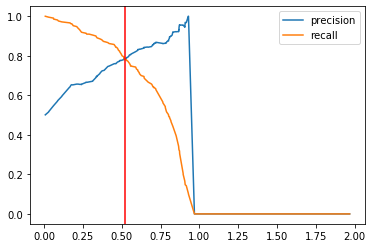

In [423]:
plt.plot(thresholds,precision)
plt.plot(thresholds,recall)
plt.legend(['precision','recall'])
plt.axvline(x=0.52,color='r')

In [424]:
recall=[]
precision=[]
li=np.arange(0.52,1,0.0001)

for i in li:
    pred1=np.where(y_pred_prob < i, 0, 1)
    recall.append(recall_score(y_test,pred1))
    precision.append(precision_score(y_test,pred1))

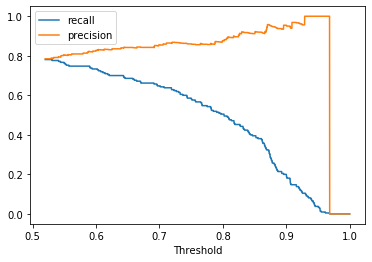

In [425]:
plt.plot(li,recall)
plt.plot(li,precision)
plt.xlabel('Threshold')
plt.legend(['recall','precision'])

In [427]:
print(classification_report(y_test,np.where(GBoost.predict_proba(X_test)[:,1] < 0.52,0,1)))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       210
           1       0.78      0.78      0.78       210

    accuracy                           0.78       420
   macro avg       0.78      0.78      0.78       420
weighted avg       0.78      0.78      0.78       420



#### Logistic Regression

In [429]:
X_train, X_test, y_train, y_test = train_test_split(X[features_selected_lr], y, test_size=0.3, random_state=42, stratify=y)

In [431]:
kf= KFold(shuffle=True, n_splits=5, random_state=0)
score = cross_val_score(lr, X[features_selected_lr], y, cv=kf, scoring='roc_auc')
print('Bias Error:',1-np.mean(score))
print('Variance Error:',np.std(score,ddof=1))

Bias Error: 0.13073366478062243
Variance Error: 0.014954259363781076


In [432]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [433]:
y_test_predicted = lr.predict(X_test)
y_train_predicted = lr.predict(X_train)

In [434]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       210
           1       0.78      0.78      0.78       210

    accuracy                           0.78       420
   macro avg       0.78      0.78      0.78       420
weighted avg       0.78      0.78      0.78       420



In [435]:
y_pred_prob = lr.predict_proba(X_test)[:,1]

In [436]:
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)

In [437]:
recall=[]
precision=[]


for i in thresholds:
    pred1 = np.where(y_pred_prob > i, 1, 0)
    recall.append(recall_score(y_test,pred1))
    precision.append(precision_score(y_test,pred1))

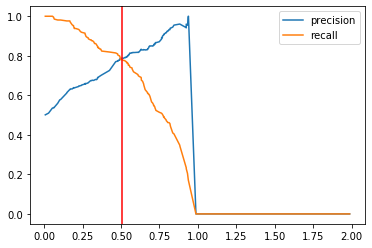

In [442]:
plt.plot(thresholds,precision)
plt.plot(thresholds,recall)
plt.legend(['precision','recall'])
plt.axvline(x=0.51,color='r')

In [443]:
recall=[]
precision=[]
li=np.arange(0.51,1,0.0001)

for i in li:
    pred1=np.where(y_pred_prob <i, 0, 1)
    recall.append(recall_score(y_test,pred1))
    precision.append(precision_score(y_test,pred1))

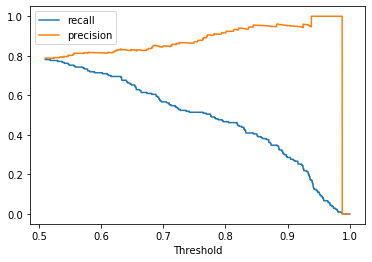

In [444]:
plt.plot(li,recall)
plt.plot(li,precision)
plt.xlabel('Threshold')
plt.legend(['recall','precision'])

In [459]:
print(classification_report(y_test,np.where(lr.predict_proba(X_test)[:,1]< 0.51,0,1)))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       210
           1       0.79      0.78      0.78       210

    accuracy                           0.79       420
   macro avg       0.79      0.79      0.79       420
weighted avg       0.79      0.79      0.79       420

